In [6]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from generate_data import generate_Ls, generate_sylvester_data
from proximal_gradient_descent import (
    get_optimizer_oracles,
    proximal_accelerated_gradient,
    project_to_lower_with_positive_diag,
    warm_start
)
from plotting_utilities import get_metrics, patternify_Ls, one_example_prs
from sklearn.metrics import precision_score, recall_score, matthews_corrcoef, auc
import pickle

# Prevent Type 3 fonts
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [4]:
from GmGM import GmGM, Dataset

# Verifying Strong Convexity

In this section, we'll verify strong convexity by demonstrating that our optimization algorithm (proximal accelerated gradient descent) exhibits linear convergence.

In [2]:
np.random.seed(0)
dims = (50, 50)
sparsity = 0.1
Ls, L_patterns = generate_Ls(dims, sparsity=sparsity)
X = generate_sylvester_data(Ls, normalize=True, source_distribution=np.random.normal)

L_init = [np.eye(d) for d in dims]

frobreg = 1/np.prod(dims)**(1/len(dims))
glassoreg = 0.5e-6
objective, gradient, proximal = get_optimizer_oracles(X, frobreg=frobreg, glassoregs=glassoreg)

Ls, (_, eps, _, _) = proximal_accelerated_gradient(
    f=objective,
    del_f=gradient,
    prox=proximal,
    P=project_to_lower_with_positive_diag,
    Ls=L_init,
    mu=0.2,
    init_alpha=1,
    tau=0.5,
    beta=0.0001,
    max_iter=5000,
    tol=1e-20
)

/Users/baileyandrew/Cartesian-LGAM/proximal_gradient_descent.py:43: UserWarning: Alpha too small, stopping line search
  warnings.warn("Alpha too small, stopping line search")


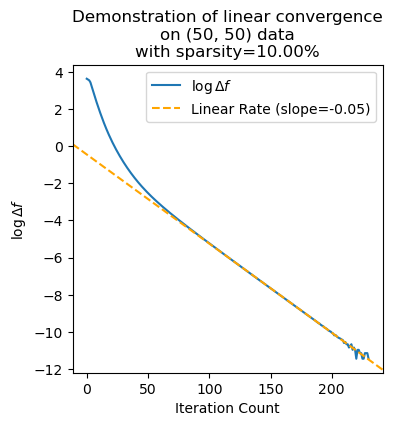

In [3]:
del_f = -np.array(eps)
iterations = np.arange(len(eps))
iterations = iterations[del_f > 0]
del_f = np.log10(del_f[del_f > 0])

linear_data = iterations > 100
slope, intercept = np.polyfit(iterations[linear_data], del_f[linear_data], deg=1)

fig, ax = plt.subplots(figsize=(4, 4))
ax.plot(iterations, del_f, label=r"$\log\Delta f$")
ax.set_title(f"Demonstration of linear convergence\non {dims} data\nwith {sparsity=:.2%}")
ax.set_xlabel("Iteration Count")
ax.set_ylabel(rf"$\log\Delta f$")
ax.axline(xy1=(0, intercept), slope=slope, linestyle='--', color='orange', label=f'Linear Rate ({slope=:.2f})')
ax.legend()
pass

In [4]:
np.random.seed(0)
dims = (30, 30, 30)
sparsity = 0.1
Ls, L_patterns = generate_Ls(dims, sparsity=sparsity)
X = generate_sylvester_data(Ls, normalize=True, source_distribution=np.random.normal)

L_init = [np.eye(d) for d in dims]

frobreg = 1/np.prod(dims)**(1/len(dims))
glassoreg = 0.5e-6
objective, gradient, proximal = get_optimizer_oracles(X, frobreg=frobreg, glassoregs=glassoreg)

Ls, (_, eps, _, _) = proximal_accelerated_gradient(
    f=objective,
    del_f=gradient,
    prox=proximal,
    P=project_to_lower_with_positive_diag,
    Ls=L_init,
    mu=0.2,
    init_alpha=1,
    tau=0.5,
    beta=0.0001,
    max_iter=5000,
    tol=1e-20
)

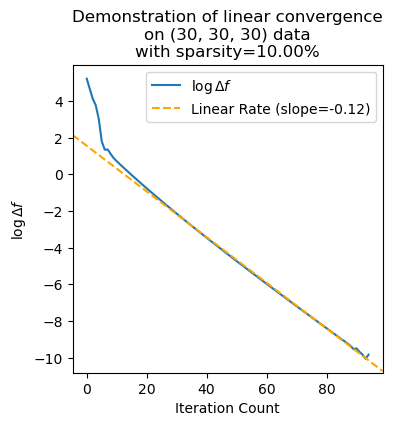

In [5]:
del_f = -np.array(eps)
iterations = np.arange(len(eps))
iterations = iterations[del_f > 0]
del_f = np.log10(del_f[del_f > 0])

linear_data = iterations > 20
slope, intercept = np.polyfit(iterations[linear_data], del_f[linear_data], deg=1)

fig, ax = plt.subplots(figsize=(4, 4))
ax.plot(iterations, del_f, label=r"$\log\Delta f$")
ax.set_title(f"Demonstration of linear convergence\non {dims} data\nwith {sparsity=:.2%}")
ax.set_xlabel("Iteration Count")
ax.set_ylabel(rf"$\log\Delta f$")
ax.axline(xy1=(0, intercept), slope=slope, linestyle='--', color='orange', label=f'Linear Rate ({slope=:.2f})')
ax.legend()
pass

In [6]:
np.random.seed(0)
dims = (100, 50)
sparsity = 0.1
Ls, L_patterns = generate_Ls(dims, sparsity=sparsity)
X = generate_sylvester_data(Ls, normalize=True, source_distribution=np.random.normal)

L_init = [np.eye(d) for d in dims]

frobreg = 1/np.prod(dims)**(1/len(dims))
glassoreg = 0.5e-6
objective, gradient, proximal = get_optimizer_oracles(X, frobreg=frobreg, glassoregs=glassoreg)

Ls, (_, eps, _, _) = proximal_accelerated_gradient(
    f=objective,
    del_f=gradient,
    prox=proximal,
    P=project_to_lower_with_positive_diag,
    Ls=L_init,
    mu=0.2,
    init_alpha=1,
    tau=0.5,
    beta=0.0001,
    max_iter=5000,
    tol=1e-20
)

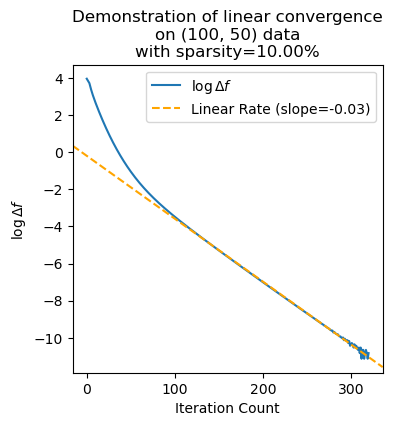

In [7]:
del_f = -np.array(eps)
iterations = np.arange(len(eps))
iterations = iterations[del_f > 0]
del_f = np.log10(del_f[del_f > 0])

linear_data = iterations > 100
slope, intercept = np.polyfit(iterations[linear_data], del_f[linear_data], deg=1)

fig, ax = plt.subplots(figsize=(4, 4))
ax.plot(iterations, del_f, label=r"$\log\Delta f$")
ax.set_title(f"Demonstration of linear convergence\non {dims} data\nwith {sparsity=:.2%}")
ax.set_xlabel("Iteration Count")
ax.set_ylabel(rf"$\log\Delta f$")
ax.axline(xy1=(0, intercept), slope=slope, linestyle='--', color='orange', label=f'Linear Rate ({slope=:.2f})')
ax.legend()
pass

In [8]:
np.random.seed(0)
dims = (50, 50)
sparsity = 0.1
Ls, L_patterns = generate_Ls(dims, sparsity=sparsity)
X = generate_sylvester_data(Ls, normalize=True, source_distribution=np.random.gumbel)

L_init = [np.eye(d) for d in dims]

frobreg = 1/np.prod(dims)**(1/len(dims))
glassoreg = 0.5e-6
objective, gradient, proximal = get_optimizer_oracles(X, frobreg=frobreg, glassoregs=glassoreg)

Ls, (_, eps, _, _) = proximal_accelerated_gradient(
    f=objective,
    del_f=gradient,
    prox=proximal,
    P=project_to_lower_with_positive_diag,
    Ls=L_init,
    mu=0.2,
    init_alpha=1,
    tau=0.5,
    beta=0.0001,
    max_iter=5000,
    tol=1e-20
)

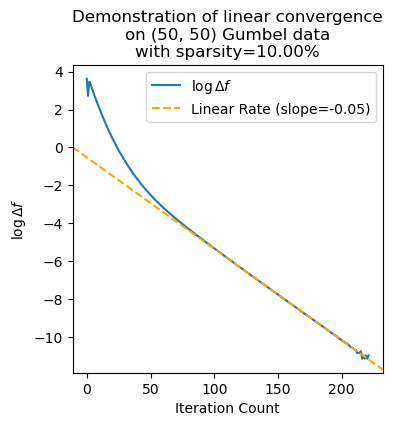

In [9]:
del_f = -np.array(eps)
iterations = np.arange(len(eps))
iterations = iterations[del_f > 0]
del_f = np.log10(del_f[del_f > 0])

linear_data = iterations > 100
slope, intercept = np.polyfit(iterations[linear_data], del_f[linear_data], deg=1)

fig, ax = plt.subplots(figsize=(4, 4))
ax.plot(iterations, del_f, label=r"$\log\Delta f$")
ax.set_title(f"Demonstration of linear convergence\non {dims} Gumbel data\nwith {sparsity=:.2%}")
ax.set_xlabel("Iteration Count")
ax.set_ylabel(rf"$\log\Delta f$")
ax.axline(xy1=(0, intercept), slope=slope, linestyle='--', color='orange', label=f'Linear Rate ({slope=:.2f})')
ax.legend()
pass

# Single-Example PR Curves

In this section, we'll generate figures showing a PR curves on a single example (the seed-0 example) to get a feel for the kinds of performance we can expect.

In [35]:
np.random.seed(0)
dims = (50, 50)
sparsity = 0.1
Ls, L_patterns = generate_Ls(dims, sparsity=sparsity)
X = generate_sylvester_data(Ls, normalize=True)

L_init = [np.eye(d) for d in dims]

frobreg = 1/np.prod(dims)**(1/len(dims))
glassoregs = np.logspace(0.2, -2, 500) # (50, 50)
Lss, _ = warm_start(X, L_init, glassoregs=glassoregs, dont_warm_start=True)
Lss_lgam, _ = warm_start(X, L_init, glassoregs=glassoregs, sample_axes={0}, dont_warm_start=True)

/Users/baileyandrew/Cartesian-LGAM/proximal_gradient_descent.py:43: UserWarning: Alpha too small, stopping line search
  warnings.warn("Alpha too small, stopping line search")


/Users/baileyandrew/Cartesian-LGAM/plotting_utilities.py:79: RuntimeWarning: invalid value encountered in divide
  precs = [TPs[i] / (TPs[i] + FPs[i]) for i in range(len(dims))]
/Users/baileyandrew/Cartesian-LGAM/plotting_utilities.py:80: RuntimeWarning: invalid value encountered in divide
  shared_precs = shared_TPs / (shared_TPs + shared_FPs)
/Users/baileyandrew/Cartesian-LGAM/plotting_utilities.py:84: RuntimeWarning: invalid value encountered in divide
  f1s = [2*precs[i]*recs[i]/(precs[i]+recs[i]) for i in range(len(dims))]
/Users/baileyandrew/Cartesian-LGAM/plotting_utilities.py:86: RuntimeWarning: invalid value encountered in divide
  (TPs[i]*TNs[i] - FPs[i]*FNs[i])
/Users/baileyandrew/Cartesian-LGAM/plotting_utilities.py:94: RuntimeWarning: invalid value encountered in divide
  shared_f1s =  2 * (shared_precs * shared_recs)/(shared_precs + shared_recs)
/Users/baileyandrew/Cartesian-LGAM/plotting_utilities.py:97: RuntimeWarning: invalid value encountered in divide
  (shared_TPs *

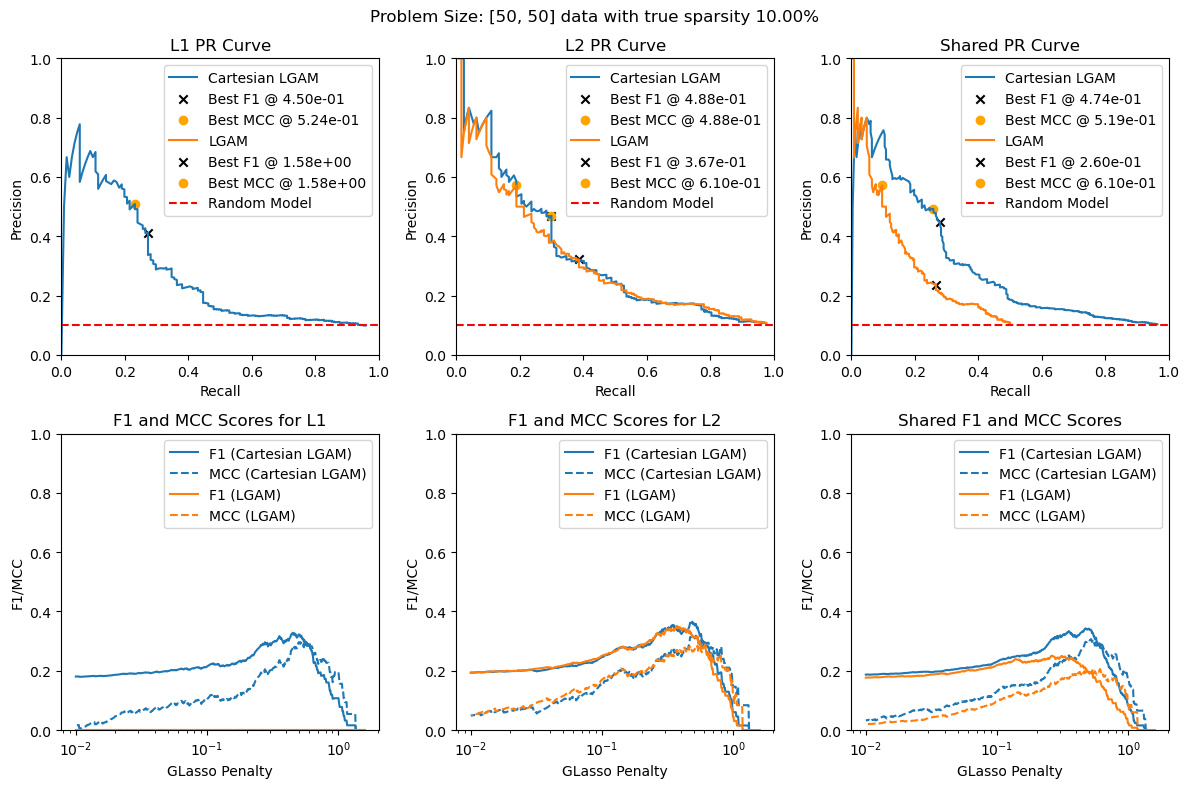

In [36]:
L_estim_patterns = patternify_Ls(Lss)
L_lgam_estim_patterns = patternify_Ls(Lss_lgam)

one_example_prs(
    L_patterns=L_patterns,
    Lss=Lss,
    Lss_lgam=Lss_lgam,
    glassoregs=glassoregs,
    sparsity=sparsity
)
pass

In [89]:
estim_edges = [L[1][np.tril_indices_from(L[1])] for L in L_estim_patterns]
baseline_edges = [L[1][np.tril_indices_from(L[1])] for L in L_lgam_estim_patterns]
true_edges = L_patterns[1][np.tril_indices_from(L_patterns[1])]

precs_clgam = [precision_score(true_edges, e) for e in estim_edges]
precs_lgam = [precision_score(true_edges, e) for e in baseline_edges]
recs_clgam = [recall_score(true_edges, e) for e in estim_edges]
recs_lgam = [recall_score(true_edges, e) for e in baseline_edges]

mccs_clgam = [matthews_corrcoef(true_edges, e) for e in estim_edges]
mccs_lgam = [matthews_corrcoef(true_edges, e) for e in baseline_edges]

sort_idxs = np.argsort(recs_clgam)
auc_clgam = auc(np.array(recs_clgam)[sort_idxs], np.array(precs_clgam)[sort_idxs])
auc_lgam = auc(recs_lgam, precs_lgam)

print(
    f"""
    CLGAM:
        Max MCC: {max(mccs_clgam)}
        AUCPR: {auc_clgam}
    LGAM:
        Max MCC: {max(mccs_lgam)}
        AUCPR: {auc_lgam}
    """
)

/Users/baileyandrew/mambaforge/envs/Cartesian-LGAM/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/baileyandrew/mambaforge/envs/Cartesian-LGAM/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/baileyandrew/mambaforge/envs/Cartesian-LGAM/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif


    CLGAM:
        Max MCC: 0.32138457590892583
        AUCPR: 0.3279570657859805
    LGAM:
        Max MCC: 0.29077529419295
        AUCPR: 0.31499226345655007
    


In [23]:
np.random.seed(0)
dims = (50, 50)
sparsity = 0.1
Ls, L_patterns = generate_Ls(dims, sparsity=sparsity)
X = generate_sylvester_data(Ls, normalize=True)

D = Dataset(
    dataset={'data': X},
    structure={'data': ('L1', 'L2')}
)

gmgm_estim_edges = []
for resolution in np.linspace(0, 1, 500):
    output = GmGM(
        D,
        to_keep=resolution,
        random_state=0,
        threshold_method='overall'
    )
    gmgm_estim_edges.append([output.precision_matrices['L1'].toarray(), output.precision_matrices['L2'].toarray()])
print(len(gmgm_estim_edges))

L_gmgm_estim_patterns = patternify_Ls(gmgm_estim_edges)

estim_edges = [L[1][np.tril_indices_from(L[1])] for L in L_gmgm_estim_patterns]
true_edges = L_patterns[1][np.tril_indices_from(L_patterns[1])]

precs_gmgm = [precision_score(true_edges, e) for e in estim_edges]
recs_gmgm = [recall_score(true_edges, e) for e in estim_edges]

mccs_gmgm = [matthews_corrcoef(true_edges, e) for e in estim_edges]

sort_idxs = np.argsort(recs_gmgm)
auc_gmgm = auc(np.array(recs_gmgm)[sort_idxs], np.array(precs_gmgm)[sort_idxs])

print(
    f"""
    GmGM:
        Max MCC: {max(mccs_gmgm)}
        AUCPR: {auc_gmgm}
    """
)

/Users/baileyandrew/mambaforge/envs/Cartesian-LGAM/lib/python3.12/site-packages/GmGM/GmGM.py:231: UserWarning: This is outdated, will swap to using direct_left_eigenvectors in the future
  warnings.warn("This is outdated, will swap to using direct_left_eigenvectors in the future")


500


/Users/baileyandrew/mambaforge/envs/Cartesian-LGAM/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



    GmGM:
        Max MCC: 0.3331821575168062
        AUCPR: 0.3449886873005868
    


In [43]:
with open("results/synthetic_normal", "wb") as fp:
    pickle.dump({
        'CLGAM': L_estim_patterns,
        'LGAM': L_lgam_estim_patterns,
        'True': L_patterns
    }, fp)

In [13]:
np.random.seed(0)
dims = (50, 50)
sparsity = 0.1
Ls, L_patterns = generate_Ls(dims, sparsity=sparsity)
X = generate_sylvester_data(Ls, normalize=True, source_distribution=np.random.gumbel)

L_init = [np.eye(d) for d in dims]

frobreg = 1/np.prod(dims)**(1/len(dims))
glassoregs = np.logspace(0.2, -2, 500) # (50, 50)
Lss, _ = warm_start(X, L_init, glassoregs=glassoregs, dont_warm_start=True)
Lss_lgam, _ = warm_start(X, L_init, glassoregs=glassoregs, sample_axes={0}, dont_warm_start=True)

/Users/baileyandrew/Cartesian-LGAM/proximal_gradient_descent.py:43: UserWarning: Alpha too small, stopping line search
  warnings.warn("Alpha too small, stopping line search")


/Users/baileyandrew/Cartesian-LGAM/plotting_utilities.py:79: RuntimeWarning: invalid value encountered in divide
  precs = [TPs[i] / (TPs[i] + FPs[i]) for i in range(len(dims))]
/Users/baileyandrew/Cartesian-LGAM/plotting_utilities.py:86: RuntimeWarning: invalid value encountered in divide
  (TPs[i]*TNs[i] - FPs[i]*FNs[i])


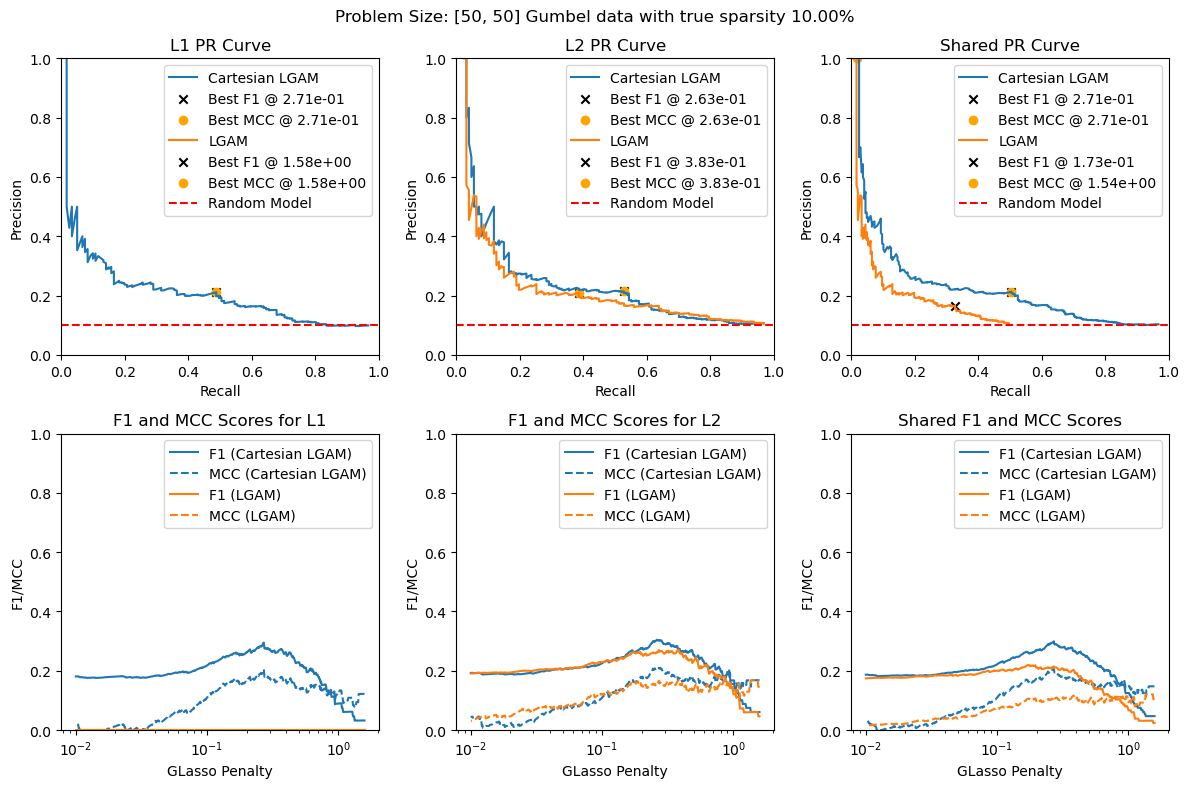

In [14]:
L_estim_patterns = patternify_Ls(Lss)
L_lgam_estim_patterns = patternify_Ls(Lss_lgam)

one_example_prs(
    L_patterns=L_patterns,
    Lss=Lss,
    Lss_lgam=Lss_lgam,
    glassoregs=glassoregs,
    sparsity=sparsity,
    source_distr="Gumbel"
)
pass

In [87]:
estim_edges = [L[1][np.tril_indices_from(L[1], k=-1)] for L in L_estim_patterns]
baseline_edges = [L[1][np.tril_indices_from(L[1], k=-1)] for L in L_lgam_estim_patterns]
true_edges = L_patterns[1][np.tril_indices_from(L_patterns[1], k=-1)]

precs_clgam = [precision_score(true_edges, e) for e in estim_edges]
precs_lgam = [precision_score(true_edges, e) for e in baseline_edges]
recs_clgam = [recall_score(true_edges, e) for e in estim_edges]
recs_lgam = [recall_score(true_edges, e) for e in baseline_edges]

mccs_clgam = [matthews_corrcoef(true_edges, e) for e in estim_edges]
mccs_lgam = [matthews_corrcoef(true_edges, e) for e in baseline_edges]
auc_clgam = auc(recs_clgam, precs_clgam)
auc_lgam = auc(recs_lgam, precs_lgam)

print(
    f"""
    CLGAM:
        Max MCC: {max(mccs_clgam)}
        AUCPR: {auc_clgam}
    LGAM:
        Max MCC: {max(mccs_lgam)}
        AUCPR: {auc_lgam}
    """
)


    CLGAM:
        Max MCC: 0.21213585914347313
        AUCPR: 0.2075130512960575
    LGAM:
        Max MCC: 0.16853696250647365
        AUCPR: 0.1952620154258392
    


In [27]:
np.random.seed(0)
dims = (50, 50)
sparsity = 0.1
Ls, L_patterns = generate_Ls(dims, sparsity=sparsity)
X = generate_sylvester_data(Ls, normalize=True, source_distribution=np.random.gumbel)

D = Dataset(
    dataset={'data': X},
    structure={'data': ('L1', 'L2')}
)

gmgm_estim_edges = []
for resolution in np.linspace(0, 1, 100):
    output = GmGM(
        D,
        to_keep=resolution,
        random_state=0,
        threshold_method='overall'
    )
    gmgm_estim_edges.append([output.precision_matrices[key].toarray() for key in ['L1', 'L2']])
print(len(gmgm_estim_edges))

L_gmgm_estim_patterns = patternify_Ls(gmgm_estim_edges)

estim_edges = [L[1][np.tril_indices_from(L[1])] for L in L_gmgm_estim_patterns]
true_edges = L_patterns[1][np.tril_indices_from(L_patterns[1])]

precs_gmgm = [precision_score(true_edges, e) for e in estim_edges]
recs_gmgm = [recall_score(true_edges, e) for e in estim_edges]

mccs_gmgm = [matthews_corrcoef(true_edges, e) for e in estim_edges]

sort_idxs = np.argsort(recs_gmgm)
auc_gmgm = auc(np.array(recs_gmgm)[sort_idxs], np.array(precs_gmgm)[sort_idxs])

print(
    f"""
    GmGM:
        Max MCC: {max(mccs_gmgm)}
        AUCPR: {auc_gmgm}
    """
)

/Users/baileyandrew/mambaforge/envs/Cartesian-LGAM/lib/python3.12/site-packages/GmGM/GmGM.py:231: UserWarning: This is outdated, will swap to using direct_left_eigenvectors in the future
  warnings.warn("This is outdated, will swap to using direct_left_eigenvectors in the future")


100

    GmGM:
        Max MCC: 0.25346369132723967
        AUCPR: 0.25083045963205425
    


/Users/baileyandrew/mambaforge/envs/Cartesian-LGAM/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [34]:
with open("results/synthetic_gumbel", "wb") as fp:
    pickle.dump({
        'CLGAM': L_estim_patterns,
        'LGAM': L_lgam_estim_patterns,
        'True': L_patterns
    }, fp)

In [105]:
np.random.seed(0)
dims = (40, 40, 40)
sparsity = 0.1
Ls, L_patterns = generate_Ls(dims, sparsity=sparsity)
X = generate_sylvester_data(Ls, normalize=True)

L_init = [np.eye(d) for d in dims]

frobreg = 1/np.prod(dims)**(1/len(dims))
glassoregs = np.logspace(0.5, -2, 100) # (50, 50)
Lss, _ = warm_start(X, L_init, glassoregs=glassoregs, dont_warm_start=True)
Lss_lgam, _ = warm_start(X, L_init, glassoregs=glassoregs, sample_axes={0, 1}, dont_warm_start=True)

/Users/baileyandrew/Cartesian-LGAM/proximal_gradient_descent.py:43: UserWarning: Alpha too small, stopping line search
  warnings.warn("Alpha too small, stopping line search")


/Users/baileyandrew/Cartesian-LGAM/plotting_utilities.py:79: RuntimeWarning: invalid value encountered in divide
  precs = [TPs[i] / (TPs[i] + FPs[i]) for i in range(len(dims))]
/Users/baileyandrew/Cartesian-LGAM/plotting_utilities.py:86: RuntimeWarning: invalid value encountered in divide
  (TPs[i]*TNs[i] - FPs[i]*FNs[i])


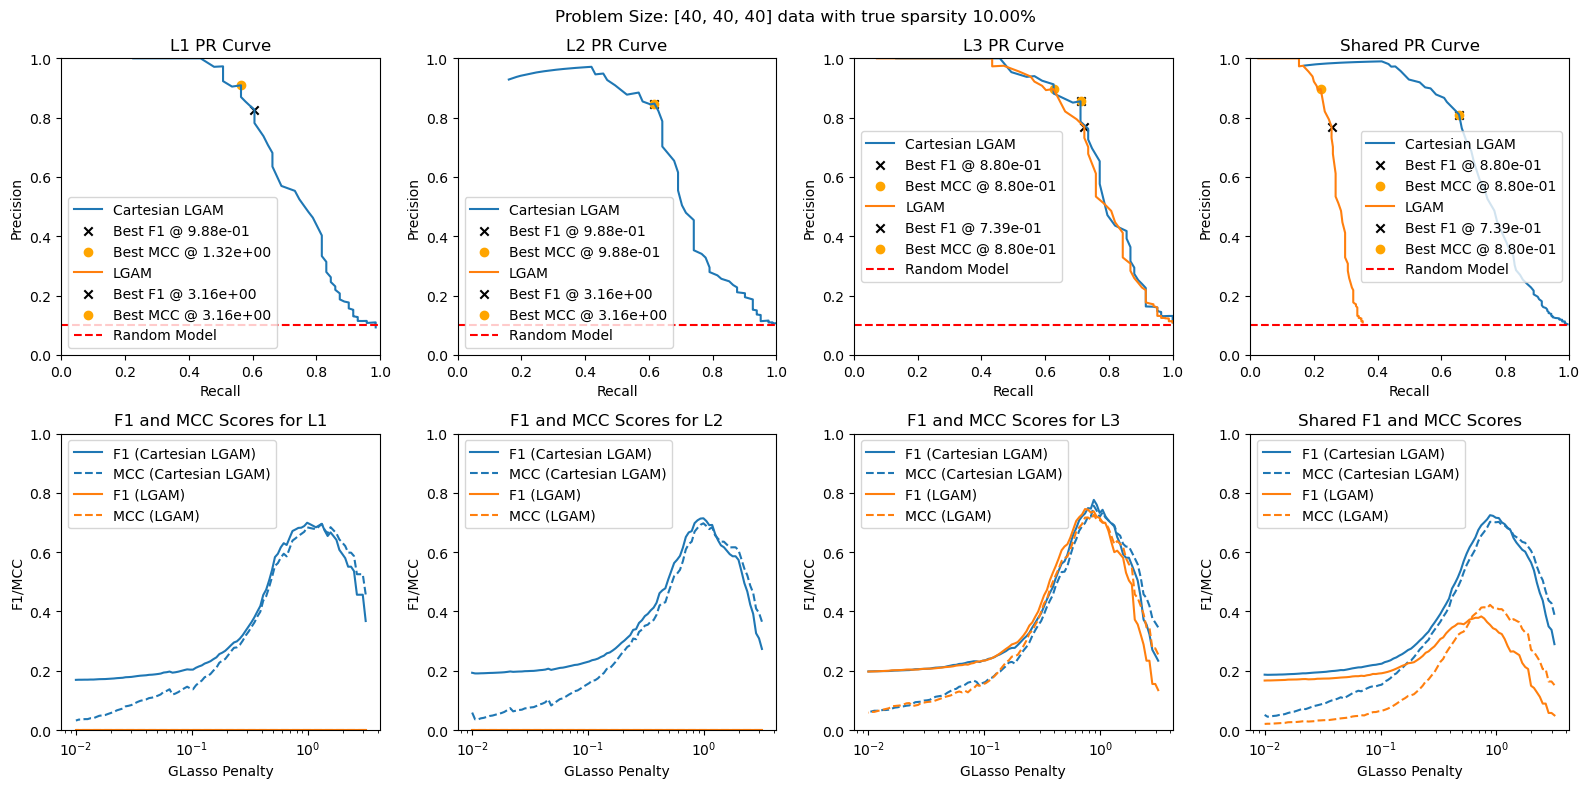

In [106]:
L_estim_patterns = patternify_Ls(Lss)
L_lgam_estim_patterns = patternify_Ls(Lss_lgam)

one_example_prs(
    L_patterns=L_patterns,
    Lss=Lss,
    Lss_lgam=Lss_lgam,
    glassoregs=glassoregs,
    sparsity=sparsity
)
pass

In [ ]:
estim_edges = [L[2][np.tril_indices_from(L[2], k=-1)] for L in L_estim_patterns]
baseline_edges = [L[2][np.tril_indices_from(L[2], k=-1)] for L in L_lgam_estim_patterns]
true_edges = L_patterns[2][np.tril_indices_from(L_patterns[2], k=-1)]

# They didn't quite reach the "fully regularized" or "fully unregularized" stage for this experiment
precs_clgam = [1] + [precision_score(true_edges, e) for e in estim_edges] + [0]
precs_lgam = [1] + [precision_score(true_edges, e) for e in baseline_edges] + [0]
recs_clgam = [0] + [recall_score(true_edges, e) for e in estim_edges] + [1]
recs_lgam = [0] + [recall_score(true_edges, e) for e in baseline_edges] + [1]

mccs_clgam = [matthews_corrcoef(true_edges, e) for e in estim_edges]
mccs_lgam = [matthews_corrcoef(true_edges, e) for e in baseline_edges]

sort_idxs = np.argsort(recs_clgam)
auc_clgam = auc(np.array(recs_clgam)[sort_idxs], np.array(precs_clgam)[sort_idxs])
sort_idxs = np.argsort(recs_lgam)
auc_lgam = auc(np.array(recs_lgam)[sort_idxs], np.array(precs_lgam)[sort_idxs])

print(
    f"""
    CLGAM:
        Max MCC: {max(mccs_clgam)}
        AUCPR: {auc_clgam}
    LGAM:
        Max MCC: {max(mccs_lgam)}
        AUCPR: {auc_lgam}
    """
)


    CLGAM:
        Max MCC: 0.7563360878807358
        AUCPR: 0.8012970491668373
    LGAM:
        Max MCC: 0.7262554763582708
        AUCPR: 0.7906589297223332
    


In [26]:
np.random.seed(0)
dims = (40, 40, 40)
sparsity = 0.1
Ls, L_patterns = generate_Ls(dims, sparsity=sparsity)
X = generate_sylvester_data(Ls, normalize=True)

D = Dataset(
    dataset={'data': X},
    structure={'data': ('L1', 'L2', 'L3')}
)

gmgm_estim_edges = []
for resolution in np.linspace(0, 1, 100):
    output = GmGM(
        D,
        to_keep=resolution,
        random_state=0,
        threshold_method='overall'
    )
    gmgm_estim_edges.append([output.precision_matrices[key].toarray() for key in ['L1', 'L2', 'L3']])
print(len(gmgm_estim_edges))

L_gmgm_estim_patterns = patternify_Ls(gmgm_estim_edges)

estim_edges = [L[1][np.tril_indices_from(L[1])] for L in L_gmgm_estim_patterns]
true_edges = L_patterns[1][np.tril_indices_from(L_patterns[1])]

precs_gmgm = [precision_score(true_edges, e) for e in estim_edges]
recs_gmgm = [recall_score(true_edges, e) for e in estim_edges]

mccs_gmgm = [matthews_corrcoef(true_edges, e) for e in estim_edges]

sort_idxs = np.argsort(recs_gmgm)
auc_gmgm = auc(np.array(recs_gmgm)[sort_idxs], np.array(precs_gmgm)[sort_idxs])

print(
    f"""
    GmGM:
        Max MCC: {max(mccs_gmgm)}
        AUCPR: {auc_gmgm}
    """
)

/Users/baileyandrew/mambaforge/envs/Cartesian-LGAM/lib/python3.12/site-packages/GmGM/GmGM.py:231: UserWarning: This is outdated, will swap to using direct_left_eigenvectors in the future
  warnings.warn("This is outdated, will swap to using direct_left_eigenvectors in the future")


100

    GmGM:
        Max MCC: 0.6744638393122699
        AUCPR: 0.6427929785995614
    


/Users/baileyandrew/mambaforge/envs/Cartesian-LGAM/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [123]:
with open("results/synthetic_tensor", "wb") as fp:
    pickle.dump({
        'CLGAM': L_estim_patterns,
        'LGAM': L_lgam_estim_patterns,
        'True': L_patterns
    }, fp)

In [90]:
np.random.seed(0)
dims = (50, 50)
sparsity = 0.1
Ls, L_patterns = generate_Ls(dims, sparsity=sparsity)
Ls[1] = np.diag(np.ones(dims[1])) + np.diag(np.ones(dims[1]-1), k=-1)
L_patterns[1] = Ls[1] != 0
X = generate_sylvester_data(Ls, normalize=True)

L_init = [np.eye(d) for d in dims]

frobreg = 1/np.prod(dims)**(1/len(dims))
glassoregs = np.logspace(0.2, -2, 200) # (50, 50)
Lss, _ = warm_start(X, L_init, glassoregs=glassoregs, dont_warm_start=True)
Lss_lgam, _ = warm_start(X, L_init, glassoregs=glassoregs, sample_axes={0}, dont_warm_start=True)

/Users/baileyandrew/Cartesian-LGAM/proximal_gradient_descent.py:43: UserWarning: Alpha too small, stopping line search
  warnings.warn("Alpha too small, stopping line search")


/Users/baileyandrew/Cartesian-LGAM/plotting_utilities.py:79: RuntimeWarning: invalid value encountered in divide
  precs = [TPs[i] / (TPs[i] + FPs[i]) for i in range(len(dims))]
/Users/baileyandrew/Cartesian-LGAM/plotting_utilities.py:86: RuntimeWarning: invalid value encountered in divide
  (TPs[i]*TNs[i] - FPs[i]*FNs[i])


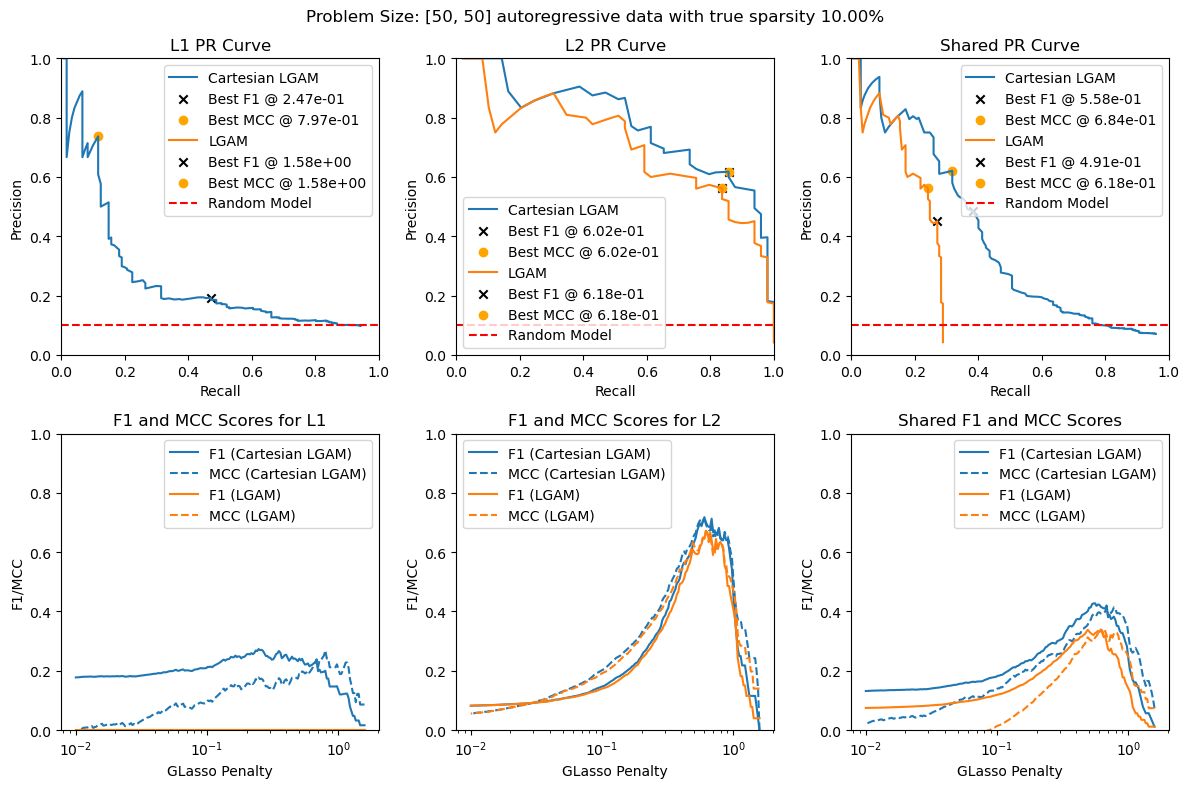

In [91]:
L_estim_patterns = patternify_Ls(Lss)
L_lgam_estim_patterns = patternify_Ls(Lss_lgam)

one_example_prs(
    L_patterns=L_patterns,
    Lss=Lss,
    Lss_lgam=Lss_lgam,
    glassoregs=glassoregs,
    sparsity=sparsity,
    source_distr="autoregressive"
)
pass

In [94]:
estim_edges = [L[1][np.tril_indices_from(L[1], k=-1)] for L in L_estim_patterns]
baseline_edges = [L[1][np.tril_indices_from(L[1], k=-1)] for L in L_lgam_estim_patterns]
true_edges = L_patterns[1][np.tril_indices_from(L_patterns[1], k=-1)]

precs_clgam = [precision_score(true_edges, e) for e in estim_edges]
precs_lgam = [precision_score(true_edges, e) for e in baseline_edges]
recs_clgam = [recall_score(true_edges, e) for e in estim_edges]
recs_lgam = [recall_score(true_edges, e) for e in baseline_edges]

mccs_clgam = [matthews_corrcoef(true_edges, e) for e in estim_edges]
mccs_lgam = [matthews_corrcoef(true_edges, e) for e in baseline_edges]

sort_idxs = np.argsort(recs_clgam)
auc_clgam = auc(np.array(recs_clgam)[sort_idxs], np.array(precs_clgam)[sort_idxs])
sort_idxs = np.argsort(recs_lgam)
auc_lgam = auc(np.array(recs_lgam)[sort_idxs], np.array(precs_lgam)[sort_idxs])

print(
    f"""
    CLGAM:
        Max MCC: {max(mccs_clgam)}
        AUCPR: {auc_clgam}
    LGAM:
        Max MCC: {max(mccs_lgam)}
        AUCPR: {auc_lgam}
    """
)

/Users/baileyandrew/mambaforge/envs/Cartesian-LGAM/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



    CLGAM:
        Max MCC: 0.7146357383172075
        AUCPR: 0.7618597982272866
    LGAM:
        Max MCC: 0.6701062335794902
        AUCPR: 0.6799678861054714
    


In [28]:
np.random.seed(0)
dims = (50, 50)
sparsity = 0.1
Ls, L_patterns = generate_Ls(dims, sparsity=sparsity)
Ls[1] = np.diag(np.ones(dims[1])) + np.diag(np.ones(dims[1]-1), k=-1)
L_patterns[1] = Ls[1] != 0
X = generate_sylvester_data(Ls, normalize=True)

D = Dataset(
    dataset={'data': X},
    structure={'data': ('L1', 'L2')}
)

gmgm_estim_edges = []
for resolution in np.linspace(0, 1, 100):
    output = GmGM(
        D,
        to_keep=resolution,
        random_state=0,
        threshold_method='overall'
    )
    gmgm_estim_edges.append([output.precision_matrices[key].toarray() for key in ['L1', 'L2']])
print(len(gmgm_estim_edges))

L_gmgm_estim_patterns = patternify_Ls(gmgm_estim_edges)

estim_edges = [L[1][np.tril_indices_from(L[1])] for L in L_gmgm_estim_patterns]
true_edges = L_patterns[1][np.tril_indices_from(L_patterns[1])]

precs_gmgm = [precision_score(true_edges, e) for e in estim_edges]
recs_gmgm = [recall_score(true_edges, e) for e in estim_edges]

mccs_gmgm = [matthews_corrcoef(true_edges, e) for e in estim_edges]

sort_idxs = np.argsort(recs_gmgm)
auc_gmgm = auc(np.array(recs_gmgm)[sort_idxs], np.array(precs_gmgm)[sort_idxs])

print(
    f"""
    GmGM:
        Max MCC: {max(mccs_gmgm)}
        AUCPR: {auc_gmgm}
    """
)

/Users/baileyandrew/mambaforge/envs/Cartesian-LGAM/lib/python3.12/site-packages/GmGM/GmGM.py:231: UserWarning: This is outdated, will swap to using direct_left_eigenvectors in the future
  warnings.warn("This is outdated, will swap to using direct_left_eigenvectors in the future")


100

    GmGM:
        Max MCC: 0.5518204124653876
        AUCPR: 0.3698303767530841
    


/Users/baileyandrew/mambaforge/envs/Cartesian-LGAM/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [95]:
with open("results/synthetic_autoregressive", "wb") as fp:
    pickle.dump({
        'CLGAM': L_estim_patterns,
        'LGAM': L_lgam_estim_patterns,
        'True': L_patterns
    }, fp)

In [97]:
np.random.seed(0)
dims = (100, 50)
sparsity = 0.1
Ls, L_patterns = generate_Ls(dims, sparsity=sparsity)
X = generate_sylvester_data(Ls, normalize=True)

L_init = [np.eye(d) for d in dims]

frobreg = 1/np.prod(dims)**(1/len(dims))
glassoregs = np.logspace(0.2, -2, 200) # (50, 50)
print("Starting CLGAM")
Lss, _ = warm_start(X, L_init, glassoregs=glassoregs, dont_warm_start=True, max_iter=1000)
print("Starting LGAM on 50-axis")
Lss_lgam, _ = warm_start(X, L_init, glassoregs=glassoregs, sample_axes={0}, dont_warm_start=True, max_iter=1000)
print("Starting LGAM on 200-axis")
Lss_lgam2, _ = warm_start(X, L_init, glassoregs=glassoregs, sample_axes={1}, dont_warm_start=True, max_iter=1000)

Starting CLGAM


/Users/baileyandrew/Cartesian-LGAM/proximal_gradient_descent.py:43: UserWarning: Alpha too small, stopping line search
  warnings.warn("Alpha too small, stopping line search")


Starting LGAM on 50-axis
Starting LGAM on 200-axis


/Users/baileyandrew/Cartesian-LGAM/plotting_utilities.py:79: RuntimeWarning: invalid value encountered in divide
  precs = [TPs[i] / (TPs[i] + FPs[i]) for i in range(len(dims))]
/Users/baileyandrew/Cartesian-LGAM/plotting_utilities.py:86: RuntimeWarning: invalid value encountered in divide
  (TPs[i]*TNs[i] - FPs[i]*FNs[i])
/Users/baileyandrew/Cartesian-LGAM/plotting_utilities.py:80: RuntimeWarning: invalid value encountered in divide
  shared_precs = shared_TPs / (shared_TPs + shared_FPs)
/Users/baileyandrew/Cartesian-LGAM/plotting_utilities.py:97: RuntimeWarning: invalid value encountered in divide
  (shared_TPs * shared_TNs - shared_FPs * shared_FNs)


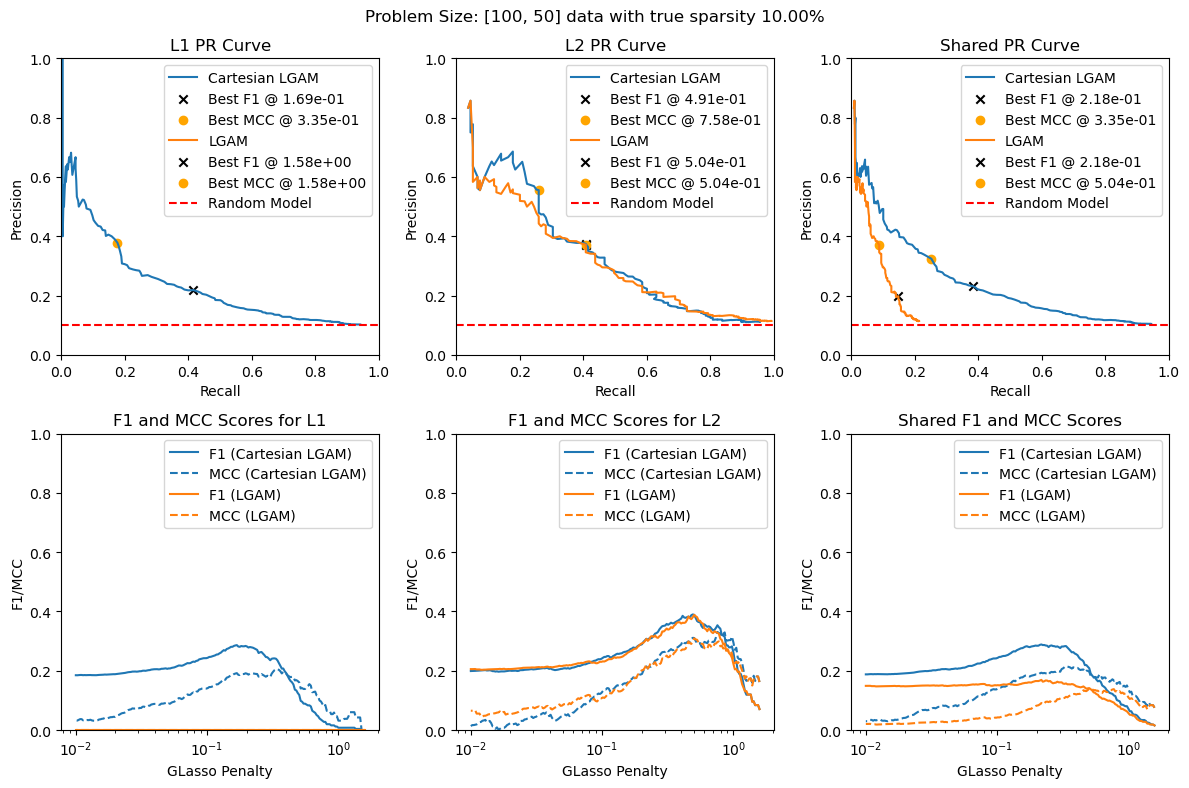

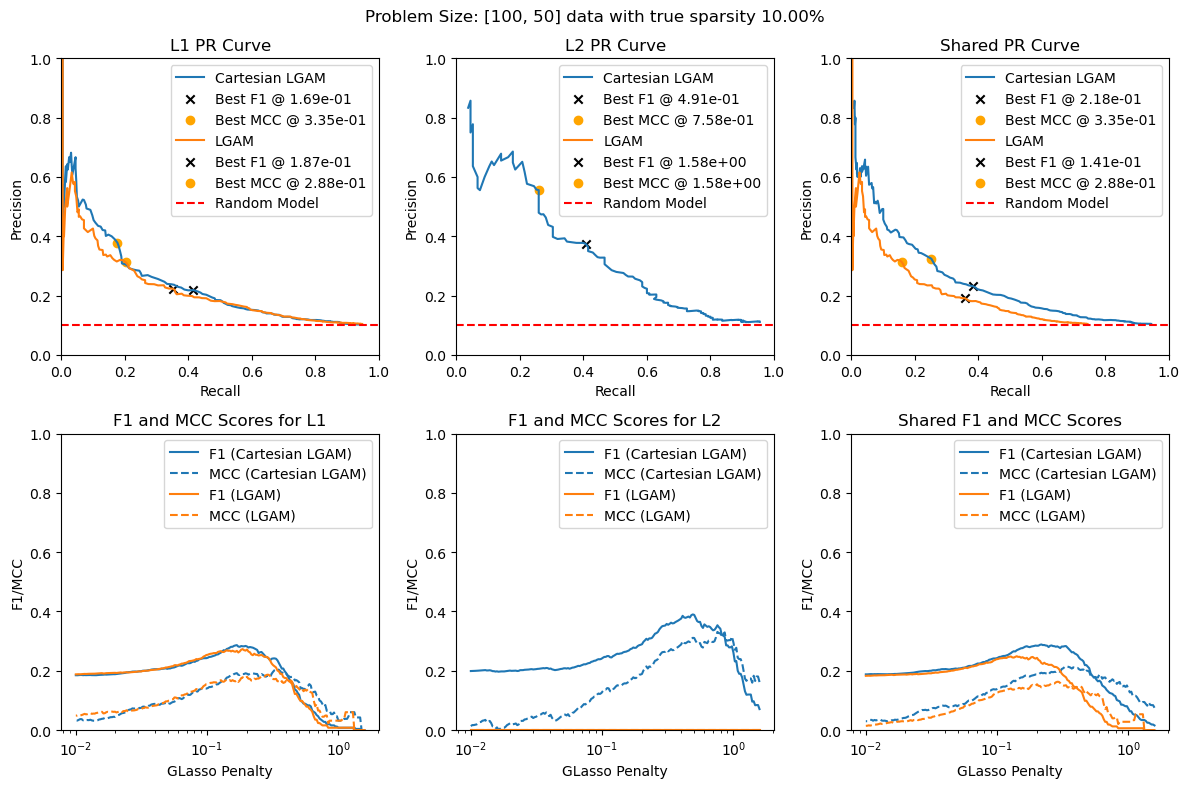

In [98]:
L_estim_patterns = patternify_Ls(Lss)
L_lgam_estim_patterns = patternify_Ls(Lss_lgam)
L_lgam2_estim_patterns = patternify_Ls(Lss_lgam2)

one_example_prs(
    L_patterns=L_patterns,
    Lss=Lss,
    Lss_lgam=Lss_lgam,
    glassoregs=glassoregs,
    sparsity=sparsity,
)
one_example_prs(
    L_patterns=L_patterns,
    Lss=Lss,
    Lss_lgam=Lss_lgam2,
    glassoregs=glassoregs,
    sparsity=sparsity,
)
pass

In [102]:
estim_edges = [L[1][np.tril_indices_from(L[1])] for L in L_estim_patterns]
baseline_edges = [L[1][np.tril_indices_from(L[1])] for L in L_lgam_estim_patterns]
true_edges = L_patterns[1][np.tril_indices_from(L_patterns[1])]

precs_clgam = [precision_score(true_edges, e) for e in estim_edges]
precs_lgam = [precision_score(true_edges, e) for e in baseline_edges]
recs_clgam = [recall_score(true_edges, e) for e in estim_edges]
recs_lgam = [recall_score(true_edges, e) for e in baseline_edges]

mccs_clgam = [matthews_corrcoef(true_edges, e) for e in estim_edges]
mccs_lgam = [matthews_corrcoef(true_edges, e) for e in baseline_edges]

sort_idxs = np.argsort(recs_clgam)
auc_clgam = auc(np.array(recs_clgam)[sort_idxs], np.array(precs_clgam)[sort_idxs])
sort_idxs = np.argsort(recs_lgam)
auc_lgam = auc(np.array(recs_lgam)[sort_idxs], np.array(precs_lgam)[sort_idxs])

print(
    f"""
    CLGAM:
        Max MCC: {max(mccs_clgam)}
        AUCPR: {auc_clgam}
    LGAM:
        Max MCC: {max(mccs_lgam)}
        AUCPR: {auc_lgam}
    """
)


    CLGAM:
        Max MCC: 0.33320142269922765
        AUCPR: 0.3077145772184889
    LGAM:
        Max MCC: 0.3129792244221204
        AUCPR: 0.2970590581897629
    


In [29]:
np.random.seed(0)
dims = (100, 50)
sparsity = 0.1
Ls, L_patterns = generate_Ls(dims, sparsity=sparsity)
X = generate_sylvester_data(Ls, normalize=True)

D = Dataset(
    dataset={'data': X},
    structure={'data': ('L1', 'L2')}
)

gmgm_estim_edges = []
for resolution in np.linspace(0, 1, 100):
    output = GmGM(
        D,
        to_keep=resolution,
        random_state=0,
        threshold_method='overall'
    )
    gmgm_estim_edges.append([output.precision_matrices[key].toarray() for key in ['L1', 'L2']])
print(len(gmgm_estim_edges))

L_gmgm_estim_patterns = patternify_Ls(gmgm_estim_edges)

estim_edges = [L[1][np.tril_indices_from(L[1])] for L in L_gmgm_estim_patterns]
true_edges = L_patterns[1][np.tril_indices_from(L_patterns[1])]

precs_gmgm = [precision_score(true_edges, e) for e in estim_edges]
recs_gmgm = [recall_score(true_edges, e) for e in estim_edges]

mccs_gmgm = [matthews_corrcoef(true_edges, e) for e in estim_edges]

sort_idxs = np.argsort(recs_gmgm)
auc_gmgm = auc(np.array(recs_gmgm)[sort_idxs], np.array(precs_gmgm)[sort_idxs])

print(
    f"""
    GmGM:
        Max MCC: {max(mccs_gmgm)}
        AUCPR: {auc_gmgm}
    """
)

/Users/baileyandrew/mambaforge/envs/Cartesian-LGAM/lib/python3.12/site-packages/GmGM/GmGM.py:231: UserWarning: This is outdated, will swap to using direct_left_eigenvectors in the future
  warnings.warn("This is outdated, will swap to using direct_left_eigenvectors in the future")


100

    GmGM:
        Max MCC: 0.28252835464240844
        AUCPR: 0.2763944326709252
    


/Users/baileyandrew/mambaforge/envs/Cartesian-LGAM/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [103]:
estim_edges = [L[0][np.tril_indices_from(L[0])] for L in L_estim_patterns]
baseline_edges = [L[0][np.tril_indices_from(L[0])] for L in L_lgam2_estim_patterns]
true_edges = L_patterns[0][np.tril_indices_from(L_patterns[0])]

precs_clgam = [precision_score(true_edges, e) for e in estim_edges]
precs_lgam = [precision_score(true_edges, e) for e in baseline_edges]
recs_clgam = [recall_score(true_edges, e) for e in estim_edges]
recs_lgam = [recall_score(true_edges, e) for e in baseline_edges]

mccs_clgam = [matthews_corrcoef(true_edges, e) for e in estim_edges]
mccs_lgam = [matthews_corrcoef(true_edges, e) for e in baseline_edges]

sort_idxs = np.argsort(recs_clgam)
auc_clgam = auc(np.array(recs_clgam)[sort_idxs], np.array(precs_clgam)[sort_idxs])
sort_idxs = np.argsort(recs_lgam)
auc_lgam = auc(np.array(recs_lgam)[sort_idxs], np.array(precs_lgam)[sort_idxs])

print(
    f"""
    CLGAM:
        Max MCC: {max(mccs_clgam)}
        AUCPR: {auc_clgam}
    LGAM:
        Max MCC: {max(mccs_lgam)}
        AUCPR: {auc_lgam}
    """
)

/Users/baileyandrew/mambaforge/envs/Cartesian-LGAM/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/baileyandrew/mambaforge/envs/Cartesian-LGAM/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/baileyandrew/mambaforge/envs/Cartesian-LGAM/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif


    CLGAM:
        Max MCC: 0.2065446252126772
        AUCPR: 0.22580838922892413
    LGAM:
        Max MCC: 0.18830472347654553
        AUCPR: 0.20896713587609167
    


In [30]:
np.random.seed(0)
dims = (100, 50)
sparsity = 0.1
Ls, L_patterns = generate_Ls(dims, sparsity=sparsity)
X = generate_sylvester_data(Ls, normalize=True)

D = Dataset(
    dataset={'data': X},
    structure={'data': ('L1', 'L2')}
)

gmgm_estim_edges = []
for resolution in np.linspace(0, 1, 100):
    output = GmGM(
        D,
        to_keep=resolution,
        random_state=0,
        threshold_method='overall'
    )
    gmgm_estim_edges.append([output.precision_matrices[key].toarray() for key in ['L1', 'L2']])
print(len(gmgm_estim_edges))

L_gmgm_estim_patterns = patternify_Ls(gmgm_estim_edges)

estim_edges = [L[0][np.tril_indices_from(L[0])] for L in L_gmgm_estim_patterns]
true_edges = L_patterns[0][np.tril_indices_from(L_patterns[0])]

precs_gmgm = [precision_score(true_edges, e) for e in estim_edges]
recs_gmgm = [recall_score(true_edges, e) for e in estim_edges]

mccs_gmgm = [matthews_corrcoef(true_edges, e) for e in estim_edges]

sort_idxs = np.argsort(recs_gmgm)
auc_gmgm = auc(np.array(recs_gmgm)[sort_idxs], np.array(precs_gmgm)[sort_idxs])

print(
    f"""
    GmGM:
        Max MCC: {max(mccs_gmgm)}
        AUCPR: {auc_gmgm}
    """
)

/Users/baileyandrew/mambaforge/envs/Cartesian-LGAM/lib/python3.12/site-packages/GmGM/GmGM.py:231: UserWarning: This is outdated, will swap to using direct_left_eigenvectors in the future
  warnings.warn("This is outdated, will swap to using direct_left_eigenvectors in the future")


100


/Users/baileyandrew/mambaforge/envs/Cartesian-LGAM/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



    GmGM:
        Max MCC: 0.15230261738966175
        AUCPR: 0.17459412688528428
    


In [104]:
with open("results/synthetic_lopsided", "wb") as fp:
    pickle.dump({
        'CLGAM': L_estim_patterns,
        'LGAM[1]': L_lgam_estim_patterns,
        'LGAM[0]': L_lgam2_estim_patterns,
        'True': L_patterns
    }, fp)

In [9]:
np.random.seed(0)
dims = (100, 100)
sparsity = 0.1
Ls, L_patterns = generate_Ls(dims, sparsity=sparsity)
X = generate_sylvester_data(Ls, normalize=True)

L_init = [np.eye(d) for d in dims]

frobreg = 1/np.prod(dims)**(1/len(dims))
glassoregs = np.logspace(0.2, -2, 100) # (50, 50)
print("Starting CLGAM")
Lss, _ = warm_start(X, L_init, glassoregs=glassoregs, dont_warm_start=True, max_iter=1000, verbose=True)
print("Starting LGAM")
Lss_lgam, _ = warm_start(X, L_init, glassoregs=glassoregs, sample_axes={0}, dont_warm_start=True, max_iter=1000)

Starting CLGAM
L1 Param: 1.5848931924611136


/Users/baileyandrew/Cartesian-LGAM/proximal_gradient_descent.py:43: UserWarning: Alpha too small, stopping line search
  warnings.warn("Alpha too small, stopping line search")


L1 Param: 1.5058363542798405
L1 Param: 1.4307229891937576
L1 Param: 1.3593563908785258
L1 Param: 1.2915496650148839
L1 Param: 1.22712523985119
L1 Param: 1.1659144011798317
L1 Param: 1.107756850509709
L1 Param: 1.052500285277733
L1 Param: 1.0
L1 Param: 0.9501185073181437
L1 Param: 0.9027251779484575
L1 Param: 0.8576958985908941
L1 Param: 0.8149127469020743
L1 Param: 0.7742636826811271
L1 Param: 0.7356422544596413
L1 Param: 0.6989473207273484
L1 Param: 0.6640827850634842
L1 Param: 0.6309573444801932
L1 Param: 0.599484250318941
L1 Param: 0.5695810810737686
L1 Param: 0.5411695265464637
L1 Param: 0.5141751827683926
L1 Param: 0.48852735715193885
L1 Param: 0.4641588833612779
L1 Param: 0.4410059454176737
L1 Param: 0.4190079105786669
L1 Param: 0.39810717055349726
L1 Param: 0.37824899063893846
L1 Param: 0.3593813663804627
L1 Param: 0.3414548873833601
L1 Param: 0.32442260791716304
L1 Param: 0.30823992397451433
L1 Param: 0.29286445646252357
L1 Param: 0.2782559402207124
L1 Param: 0.26437611857491
L

/Users/baileyandrew/Cartesian-LGAM/plotting_utilities.py:79: RuntimeWarning: invalid value encountered in divide
  precs = [TPs[i] / (TPs[i] + FPs[i]) for i in range(len(dims))]
/Users/baileyandrew/Cartesian-LGAM/plotting_utilities.py:86: RuntimeWarning: invalid value encountered in divide
  (TPs[i]*TNs[i] - FPs[i]*FNs[i])


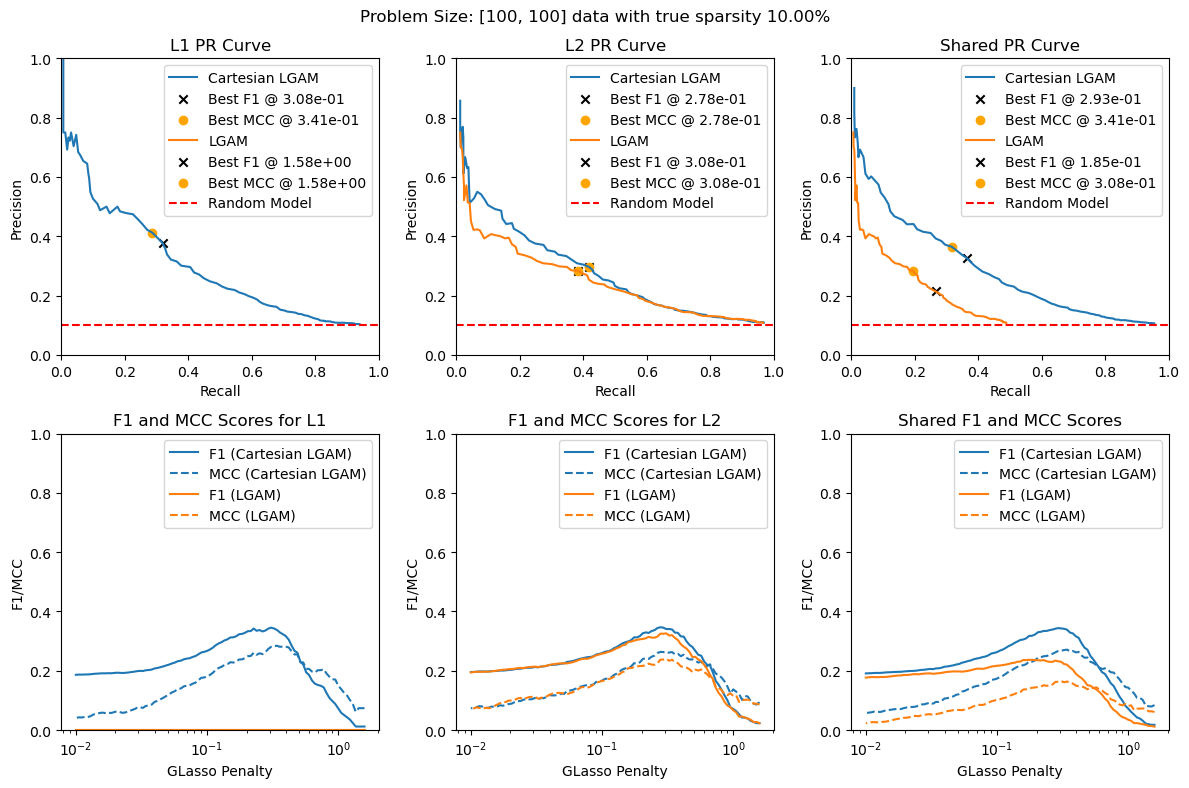

In [10]:
L_estim_patterns = patternify_Ls(Lss)
L_lgam_estim_patterns = patternify_Ls(Lss_lgam)

one_example_prs(
    L_patterns=L_patterns,
    Lss=Lss,
    Lss_lgam=Lss_lgam,
    glassoregs=glassoregs,
    sparsity=sparsity
)
pass

In [11]:
estim_edges = [L[1][np.tril_indices_from(L[1], k=-1)] for L in L_estim_patterns]
baseline_edges = [L[1][np.tril_indices_from(L[1], k=-1)] for L in L_lgam_estim_patterns]
true_edges = L_patterns[1][np.tril_indices_from(L_patterns[1], k=-1)]

precs_clgam = [1] + [precision_score(true_edges, e) for e in estim_edges] + [0]
precs_lgam = [1] + [precision_score(true_edges, e) for e in baseline_edges] + [0]
recs_clgam = [0] + [recall_score(true_edges, e) for e in estim_edges] + [1]
recs_lgam = [0] + [recall_score(true_edges, e) for e in baseline_edges] + [1]

mccs_clgam = [matthews_corrcoef(true_edges, e) for e in estim_edges]
mccs_lgam = [matthews_corrcoef(true_edges, e) for e in baseline_edges]

sort_idxs = np.argsort(recs_clgam)
auc_clgam = auc(np.array(recs_clgam)[sort_idxs], np.array(precs_clgam)[sort_idxs])
sort_idxs = np.argsort(recs_lgam)
auc_lgam = auc(np.array(recs_lgam)[sort_idxs], np.array(precs_lgam)[sort_idxs])

print(
    f"""
    CLGAM:
        Max MCC: {max(mccs_clgam)}
        AUCPR: {auc_clgam}
    LGAM:
        Max MCC: {max(mccs_lgam)}
        AUCPR: {auc_lgam}
    """
)


    CLGAM:
        Max MCC: 0.26365754519433493
        AUCPR: 0.27867015285384983
    LGAM:
        Max MCC: 0.2406545597462017
        AUCPR: 0.24950956416775225
    


In [31]:
np.random.seed(0)
dims = (100, 100)
sparsity = 0.1
Ls, L_patterns = generate_Ls(dims, sparsity=sparsity)
X = generate_sylvester_data(Ls, normalize=True)

D = Dataset(
    dataset={'data': X},
    structure={'data': ('L1', 'L2')}
)

gmgm_estim_edges = []
for resolution in np.linspace(0, 1, 100):
    output = GmGM(
        D,
        to_keep=resolution,
        random_state=0,
        threshold_method='overall'
    )
    gmgm_estim_edges.append([output.precision_matrices[key].toarray() for key in ['L1', 'L2']])
print(len(gmgm_estim_edges))

L_gmgm_estim_patterns = patternify_Ls(gmgm_estim_edges)

estim_edges = [L[1][np.tril_indices_from(L[1])] for L in L_gmgm_estim_patterns]
true_edges = L_patterns[1][np.tril_indices_from(L_patterns[1])]

precs_gmgm = [precision_score(true_edges, e) for e in estim_edges]
recs_gmgm = [recall_score(true_edges, e) for e in estim_edges]

mccs_gmgm = [matthews_corrcoef(true_edges, e) for e in estim_edges]

sort_idxs = np.argsort(recs_gmgm)
auc_gmgm = auc(np.array(recs_gmgm)[sort_idxs], np.array(precs_gmgm)[sort_idxs])

print(
    f"""
    GmGM:
        Max MCC: {max(mccs_gmgm)}
        AUCPR: {auc_gmgm}
    """
)

/Users/baileyandrew/mambaforge/envs/Cartesian-LGAM/lib/python3.12/site-packages/GmGM/GmGM.py:231: UserWarning: This is outdated, will swap to using direct_left_eigenvectors in the future
  warnings.warn("This is outdated, will swap to using direct_left_eigenvectors in the future")


100


/Users/baileyandrew/mambaforge/envs/Cartesian-LGAM/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



    GmGM:
        Max MCC: 0.23732362371059512
        AUCPR: 0.23853248249948983
    


In [12]:
with open("results/synthetic_large", "wb") as fp:
    pickle.dump({
        'CLGAM': L_estim_patterns,
        'LGAM': L_lgam_estim_patterns,
        'True': L_patterns
    }, fp)

In [18]:
np.random.seed(0)
dims = (100, 100)
sparsity = 0.025
Ls, L_patterns = generate_Ls(dims, sparsity=sparsity)
X = generate_sylvester_data(Ls, normalize=True)

L_init = [np.eye(d) for d in dims]

frobreg = 1/np.prod(dims)**(1/len(dims))
glassoregs = np.logspace(0.2, -2, 100) # (50, 50)
print("Starting CLGAM")
Lss, _ = warm_start(X, L_init, glassoregs=glassoregs, dont_warm_start=True, max_iter=1000, verbose=True)
print("Starting LGAM")
Lss_lgam, _ = warm_start(X, L_init, glassoregs=glassoregs, sample_axes={0}, dont_warm_start=True, max_iter=1000)

Starting CLGAM
L1 Param: 1.5848931924611136
L1 Param: 1.5058363542798405
L1 Param: 1.4307229891937576
L1 Param: 1.3593563908785258
L1 Param: 1.2915496650148839
L1 Param: 1.22712523985119


/Users/baileyandrew/Cartesian-LGAM/proximal_gradient_descent.py:43: UserWarning: Alpha too small, stopping line search
  warnings.warn("Alpha too small, stopping line search")


L1 Param: 1.1659144011798317
L1 Param: 1.107756850509709
L1 Param: 1.052500285277733
L1 Param: 1.0
L1 Param: 0.9501185073181437
L1 Param: 0.9027251779484575
L1 Param: 0.8576958985908941
L1 Param: 0.8149127469020743
L1 Param: 0.7742636826811271
L1 Param: 0.7356422544596413
L1 Param: 0.6989473207273484
L1 Param: 0.6640827850634842
L1 Param: 0.6309573444801932
L1 Param: 0.599484250318941
L1 Param: 0.5695810810737686
L1 Param: 0.5411695265464637
L1 Param: 0.5141751827683926
L1 Param: 0.48852735715193885
L1 Param: 0.4641588833612779
L1 Param: 0.4410059454176737
L1 Param: 0.4190079105786669
L1 Param: 0.39810717055349726
L1 Param: 0.37824899063893846
L1 Param: 0.3593813663804627
L1 Param: 0.3414548873833601
L1 Param: 0.32442260791716304
L1 Param: 0.30823992397451433
L1 Param: 0.29286445646252357
L1 Param: 0.2782559402207124
L1 Param: 0.26437611857491
L1 Param: 0.25118864315095796
L1 Param: 0.2386589786858581
L1 Param: 0.2267543125870802
L1 Param: 0.21544346900318834
L1 Param: 0.20469682718075

/Users/baileyandrew/Cartesian-LGAM/plotting_utilities.py:79: RuntimeWarning: invalid value encountered in divide
  precs = [TPs[i] / (TPs[i] + FPs[i]) for i in range(len(dims))]
/Users/baileyandrew/Cartesian-LGAM/plotting_utilities.py:80: RuntimeWarning: invalid value encountered in divide
  shared_precs = shared_TPs / (shared_TPs + shared_FPs)
/Users/baileyandrew/Cartesian-LGAM/plotting_utilities.py:86: RuntimeWarning: invalid value encountered in divide
  (TPs[i]*TNs[i] - FPs[i]*FNs[i])
/Users/baileyandrew/Cartesian-LGAM/plotting_utilities.py:97: RuntimeWarning: invalid value encountered in divide
  (shared_TPs * shared_TNs - shared_FPs * shared_FNs)


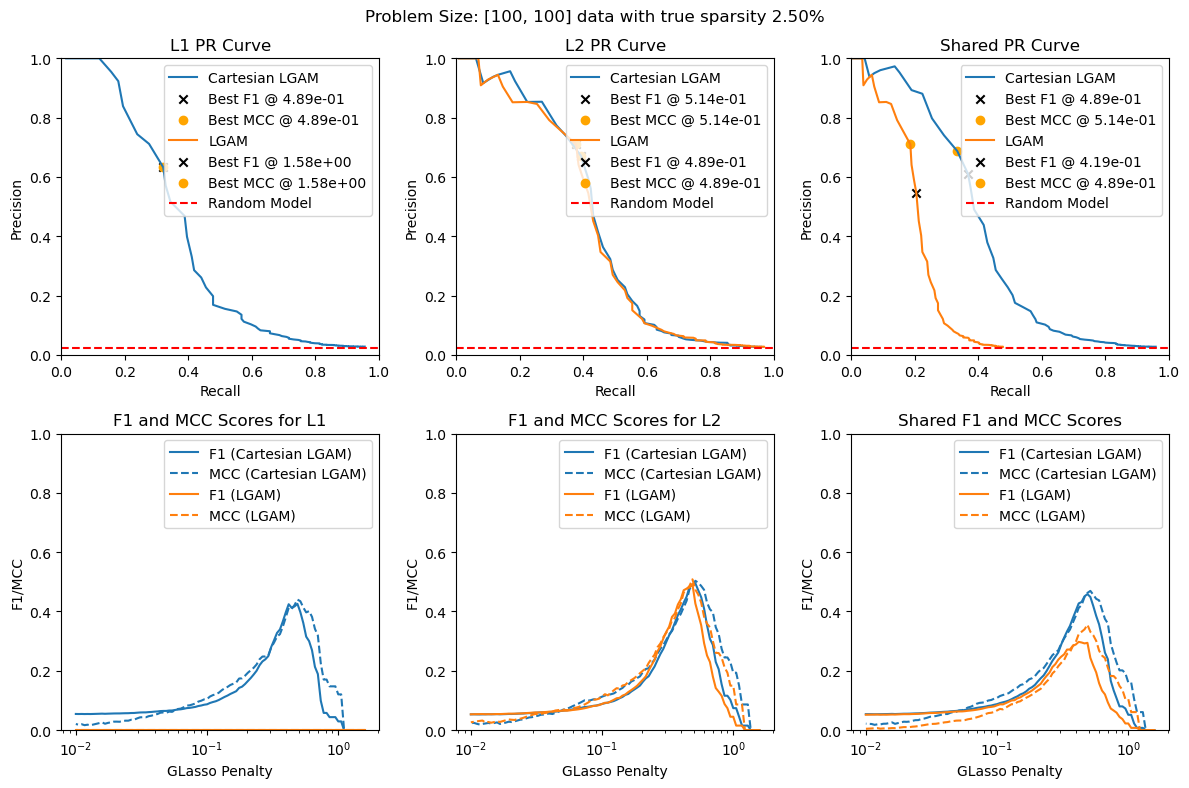

In [19]:
L_estim_patterns = patternify_Ls(Lss)
L_lgam_estim_patterns = patternify_Ls(Lss_lgam)

one_example_prs(
    L_patterns=L_patterns,
    Lss=Lss,
    Lss_lgam=Lss_lgam,
    glassoregs=glassoregs,
    sparsity=sparsity
)
pass

In [20]:
estim_edges = [L[1][np.tril_indices_from(L[1], k=-1)] for L in L_estim_patterns]
baseline_edges = [L[1][np.tril_indices_from(L[1], k=-1)] for L in L_lgam_estim_patterns]
true_edges = L_patterns[1][np.tril_indices_from(L_patterns[1], k=-1)]

precs_clgam = [1] + [precision_score(true_edges, e) for e in estim_edges] + [0]
precs_lgam = [1] + [precision_score(true_edges, e) for e in baseline_edges] + [0]
recs_clgam = [0] + [recall_score(true_edges, e) for e in estim_edges] + [1]
recs_lgam = [0] + [recall_score(true_edges, e) for e in baseline_edges] + [1]

mccs_clgam = [matthews_corrcoef(true_edges, e) for e in estim_edges]
mccs_lgam = [matthews_corrcoef(true_edges, e) for e in baseline_edges]

sort_idxs = np.argsort(recs_clgam)
auc_clgam = auc(np.array(recs_clgam)[sort_idxs], np.array(precs_clgam)[sort_idxs])
sort_idxs = np.argsort(recs_lgam)
auc_lgam = auc(np.array(recs_lgam)[sort_idxs], np.array(precs_lgam)[sort_idxs])

print(
    f"""
    CLGAM:
        Max MCC: {max(mccs_clgam)}
        AUCPR: {auc_clgam}
    LGAM:
        Max MCC: {max(mccs_lgam)}
        AUCPR: {auc_lgam}
    """
)

/Users/baileyandrew/mambaforge/envs/Cartesian-LGAM/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/baileyandrew/mambaforge/envs/Cartesian-LGAM/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/baileyandrew/mambaforge/envs/Cartesian-LGAM/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif


    CLGAM:
        Max MCC: 0.5034917216906997
        AUCPR: 0.4269268927729364
    LGAM:
        Max MCC: 0.5084655219876331
        AUCPR: 0.41681681993542063
    


In [32]:
np.random.seed(0)
dims = (100, 100)
sparsity = 0.025
Ls, L_patterns = generate_Ls(dims, sparsity=sparsity)
X = generate_sylvester_data(Ls, normalize=True)

D = Dataset(
    dataset={'data': X},
    structure={'data': ('L1', 'L2')}
)

gmgm_estim_edges = []
for resolution in np.linspace(0, 1, 100):
    output = GmGM(
        D,
        to_keep=resolution,
        random_state=0,
        threshold_method='overall'
    )
    gmgm_estim_edges.append([output.precision_matrices[key].toarray() for key in ['L1', 'L2']])
print(len(gmgm_estim_edges))

L_gmgm_estim_patterns = patternify_Ls(gmgm_estim_edges)

estim_edges = [L[1][np.tril_indices_from(L[1])] for L in L_gmgm_estim_patterns]
true_edges = L_patterns[1][np.tril_indices_from(L_patterns[1])]

precs_gmgm = [precision_score(true_edges, e) for e in estim_edges]
recs_gmgm = [recall_score(true_edges, e) for e in estim_edges]

mccs_gmgm = [matthews_corrcoef(true_edges, e) for e in estim_edges]

sort_idxs = np.argsort(recs_gmgm)
auc_gmgm = auc(np.array(recs_gmgm)[sort_idxs], np.array(precs_gmgm)[sort_idxs])

print(
    f"""
    GmGM:
        Max MCC: {max(mccs_gmgm)}
        AUCPR: {auc_gmgm}
    """
)

/Users/baileyandrew/mambaforge/envs/Cartesian-LGAM/lib/python3.12/site-packages/GmGM/GmGM.py:231: UserWarning: This is outdated, will swap to using direct_left_eigenvectors in the future
  warnings.warn("This is outdated, will swap to using direct_left_eigenvectors in the future")


100


/Users/baileyandrew/mambaforge/envs/Cartesian-LGAM/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



    GmGM:
        Max MCC: 0.5267896474950343
        AUCPR: 0.27212492131416505
    


In [21]:
with open("results/synthetic_large_sparsest", "wb") as fp:
    pickle.dump({
        'CLGAM': L_estim_patterns,
        'LGAM': L_lgam_estim_patterns,
        'True': L_patterns
    }, fp)

In [22]:
np.random.seed(0)
dims = (100, 100)
sparsity = 0.05
Ls, L_patterns = generate_Ls(dims, sparsity=sparsity)
X = generate_sylvester_data(Ls, normalize=True)

L_init = [np.eye(d) for d in dims]

frobreg = 1/np.prod(dims)**(1/len(dims))
glassoregs = np.logspace(0.2, -2, 100) # (50, 50)
print("Starting CLGAM")
Lss, _ = warm_start(X, L_init, glassoregs=glassoregs, dont_warm_start=True, max_iter=1000, verbose=True)
print("Starting LGAM")
Lss_lgam, _ = warm_start(X, L_init, glassoregs=glassoregs, sample_axes={0}, dont_warm_start=True, max_iter=1000)

Starting CLGAM
L1 Param: 1.5848931924611136
L1 Param: 1.5058363542798405


/Users/baileyandrew/Cartesian-LGAM/proximal_gradient_descent.py:43: UserWarning: Alpha too small, stopping line search
  warnings.warn("Alpha too small, stopping line search")


L1 Param: 1.4307229891937576
L1 Param: 1.3593563908785258
L1 Param: 1.2915496650148839
L1 Param: 1.22712523985119
L1 Param: 1.1659144011798317
L1 Param: 1.107756850509709
L1 Param: 1.052500285277733
L1 Param: 1.0
L1 Param: 0.9501185073181437
L1 Param: 0.9027251779484575
L1 Param: 0.8576958985908941
L1 Param: 0.8149127469020743
L1 Param: 0.7742636826811271
L1 Param: 0.7356422544596413
L1 Param: 0.6989473207273484
L1 Param: 0.6640827850634842
L1 Param: 0.6309573444801932
L1 Param: 0.599484250318941
L1 Param: 0.5695810810737686
L1 Param: 0.5411695265464637
L1 Param: 0.5141751827683926
L1 Param: 0.48852735715193885
L1 Param: 0.4641588833612779
L1 Param: 0.4410059454176737
L1 Param: 0.4190079105786669
L1 Param: 0.39810717055349726
L1 Param: 0.37824899063893846
L1 Param: 0.3593813663804627
L1 Param: 0.3414548873833601
L1 Param: 0.32442260791716304
L1 Param: 0.30823992397451433
L1 Param: 0.29286445646252357
L1 Param: 0.2782559402207124
L1 Param: 0.26437611857491
L1 Param: 0.25118864315095796


/Users/baileyandrew/Cartesian-LGAM/plotting_utilities.py:79: RuntimeWarning: invalid value encountered in divide
  precs = [TPs[i] / (TPs[i] + FPs[i]) for i in range(len(dims))]
/Users/baileyandrew/Cartesian-LGAM/plotting_utilities.py:86: RuntimeWarning: invalid value encountered in divide
  (TPs[i]*TNs[i] - FPs[i]*FNs[i])


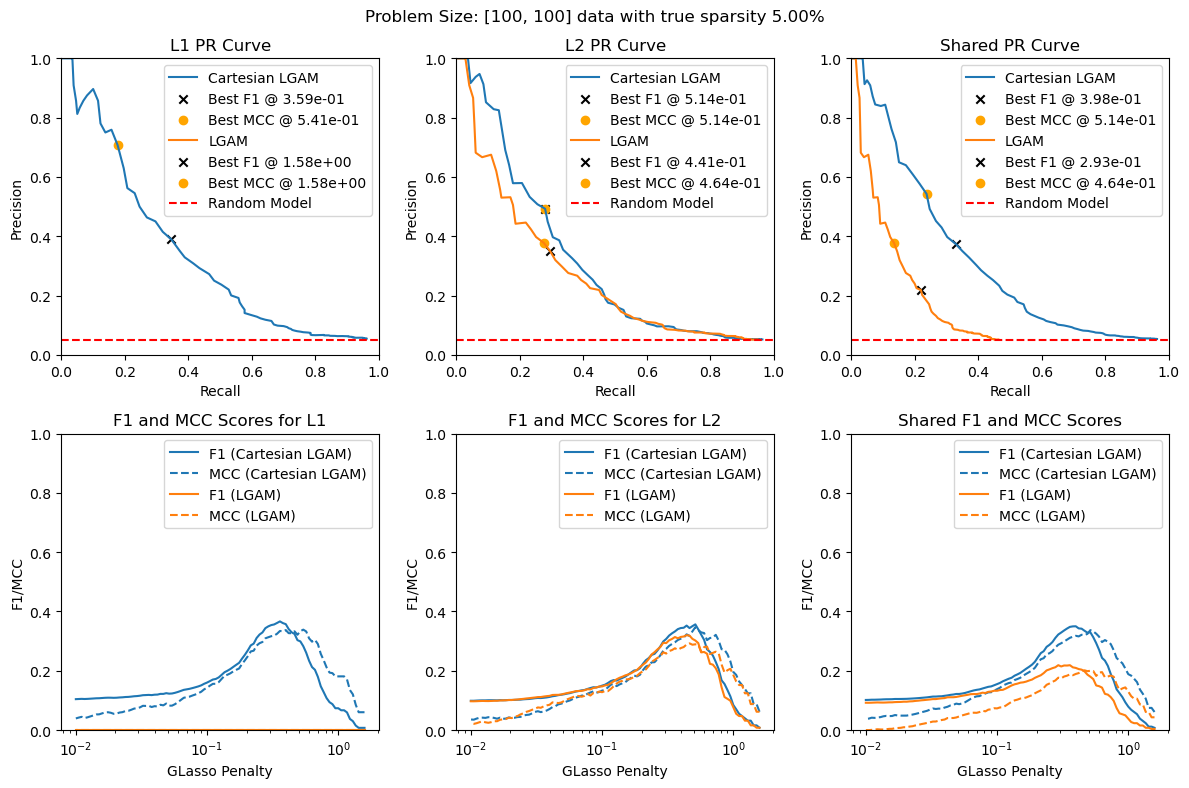

In [23]:
L_estim_patterns = patternify_Ls(Lss)
L_lgam_estim_patterns = patternify_Ls(Lss_lgam)

one_example_prs(
    L_patterns=L_patterns,
    Lss=Lss,
    Lss_lgam=Lss_lgam,
    glassoregs=glassoregs,
    sparsity=sparsity
)
pass

In [24]:
estim_edges = [L[1][np.tril_indices_from(L[1], k=-1)] for L in L_estim_patterns]
baseline_edges = [L[1][np.tril_indices_from(L[1], k=-1)] for L in L_lgam_estim_patterns]
true_edges = L_patterns[1][np.tril_indices_from(L_patterns[1], k=-1)]

precs_clgam = [1] + [precision_score(true_edges, e) for e in estim_edges] + [0]
precs_lgam = [1] + [precision_score(true_edges, e) for e in baseline_edges] + [0]
recs_clgam = [0] + [recall_score(true_edges, e) for e in estim_edges] + [1]
recs_lgam = [0] + [recall_score(true_edges, e) for e in baseline_edges] + [1]

mccs_clgam = [matthews_corrcoef(true_edges, e) for e in estim_edges]
mccs_lgam = [matthews_corrcoef(true_edges, e) for e in baseline_edges]

sort_idxs = np.argsort(recs_clgam)
auc_clgam = auc(np.array(recs_clgam)[sort_idxs], np.array(precs_clgam)[sort_idxs])
sort_idxs = np.argsort(recs_lgam)
auc_lgam = auc(np.array(recs_lgam)[sort_idxs], np.array(precs_lgam)[sort_idxs])

print(
    f"""
    CLGAM:
        Max MCC: {max(mccs_clgam)}
        AUCPR: {auc_clgam}
    LGAM:
        Max MCC: {max(mccs_lgam)}
        AUCPR: {auc_lgam}
    """
)


    CLGAM:
        Max MCC: 0.34707506380798586
        AUCPR: 0.31563008352527144
    LGAM:
        Max MCC: 0.2925227293154166
        AUCPR: 0.2698023999410492
    


In [33]:
np.random.seed(0)
dims = (100, 100)
sparsity = 0.05
Ls, L_patterns = generate_Ls(dims, sparsity=sparsity)
X = generate_sylvester_data(Ls, normalize=True)

D = Dataset(
    dataset={'data': X},
    structure={'data': ('L1', 'L2')}
)

gmgm_estim_edges = []
for resolution in np.linspace(0, 1, 100):
    output = GmGM(
        D,
        to_keep=resolution,
        random_state=0,
        threshold_method='overall'
    )
    gmgm_estim_edges.append([output.precision_matrices[key].toarray() for key in ['L1', 'L2']])
print(len(gmgm_estim_edges))

L_gmgm_estim_patterns = patternify_Ls(gmgm_estim_edges)

estim_edges = [L[1][np.tril_indices_from(L[1])] for L in L_gmgm_estim_patterns]
true_edges = L_patterns[1][np.tril_indices_from(L_patterns[1])]

precs_gmgm = [precision_score(true_edges, e) for e in estim_edges]
recs_gmgm = [recall_score(true_edges, e) for e in estim_edges]

mccs_gmgm = [matthews_corrcoef(true_edges, e) for e in estim_edges]

sort_idxs = np.argsort(recs_gmgm)
auc_gmgm = auc(np.array(recs_gmgm)[sort_idxs], np.array(precs_gmgm)[sort_idxs])

print(
    f"""
    GmGM:
        Max MCC: {max(mccs_gmgm)}
        AUCPR: {auc_gmgm}
    """
)

/Users/baileyandrew/mambaforge/envs/Cartesian-LGAM/lib/python3.12/site-packages/GmGM/GmGM.py:231: UserWarning: This is outdated, will swap to using direct_left_eigenvectors in the future
  warnings.warn("This is outdated, will swap to using direct_left_eigenvectors in the future")


100


/Users/baileyandrew/mambaforge/envs/Cartesian-LGAM/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



    GmGM:
        Max MCC: 0.38293648313415113
        AUCPR: 0.2724280846424529
    


In [25]:
with open("results/synthetic_large_sparser", "wb") as fp:
    pickle.dump({
        'CLGAM': L_estim_patterns,
        'LGAM': L_lgam_estim_patterns,
        'True': L_patterns
    }, fp)

In [26]:
np.random.seed(0)
dims = (50, 50)
sparsity = 0.1
Ls, L_patterns = generate_Ls(dims, sparsity=sparsity)
Ls[0] = np.eye(dims[0])
L_patterns[0] = Ls[0] != 0
X = generate_sylvester_data(Ls, normalize=True)

L_init = [np.eye(d) for d in dims]

frobreg = 1/np.prod(dims)**(1/len(dims))
glassoregs = np.logspace(0.2, -2, 200) # (50, 50)
print("Starting CLGAM")
Lss, _ = warm_start(X, L_init, glassoregs=glassoregs, dont_warm_start=True, max_iter=1000)
print("Starting LGAM")
Lss_lgam, _ = warm_start(X, L_init, glassoregs=glassoregs, sample_axes={0}, dont_warm_start=True, max_iter=1000)

Starting CLGAM


/Users/baileyandrew/Cartesian-LGAM/proximal_gradient_descent.py:43: UserWarning: Alpha too small, stopping line search
  warnings.warn("Alpha too small, stopping line search")


Starting LGAM


/Users/baileyandrew/Cartesian-LGAM/plotting_utilities.py:79: RuntimeWarning: invalid value encountered in divide
  precs = [TPs[i] / (TPs[i] + FPs[i]) for i in range(len(dims))]
/Users/baileyandrew/Cartesian-LGAM/plotting_utilities.py:80: RuntimeWarning: invalid value encountered in divide
  shared_precs = shared_TPs / (shared_TPs + shared_FPs)
/Users/baileyandrew/Cartesian-LGAM/plotting_utilities.py:81: RuntimeWarning: invalid value encountered in divide
  recs = [TPs[i] / (TPs[i] + FNs[i]) for i in range(len(dims))]
/Users/baileyandrew/Cartesian-LGAM/plotting_utilities.py:86: RuntimeWarning: invalid value encountered in divide
  (TPs[i]*TNs[i] - FPs[i]*FNs[i])
/Users/baileyandrew/Cartesian-LGAM/plotting_utilities.py:97: RuntimeWarning: invalid value encountered in divide
  (shared_TPs * shared_TNs - shared_FPs * shared_FNs)


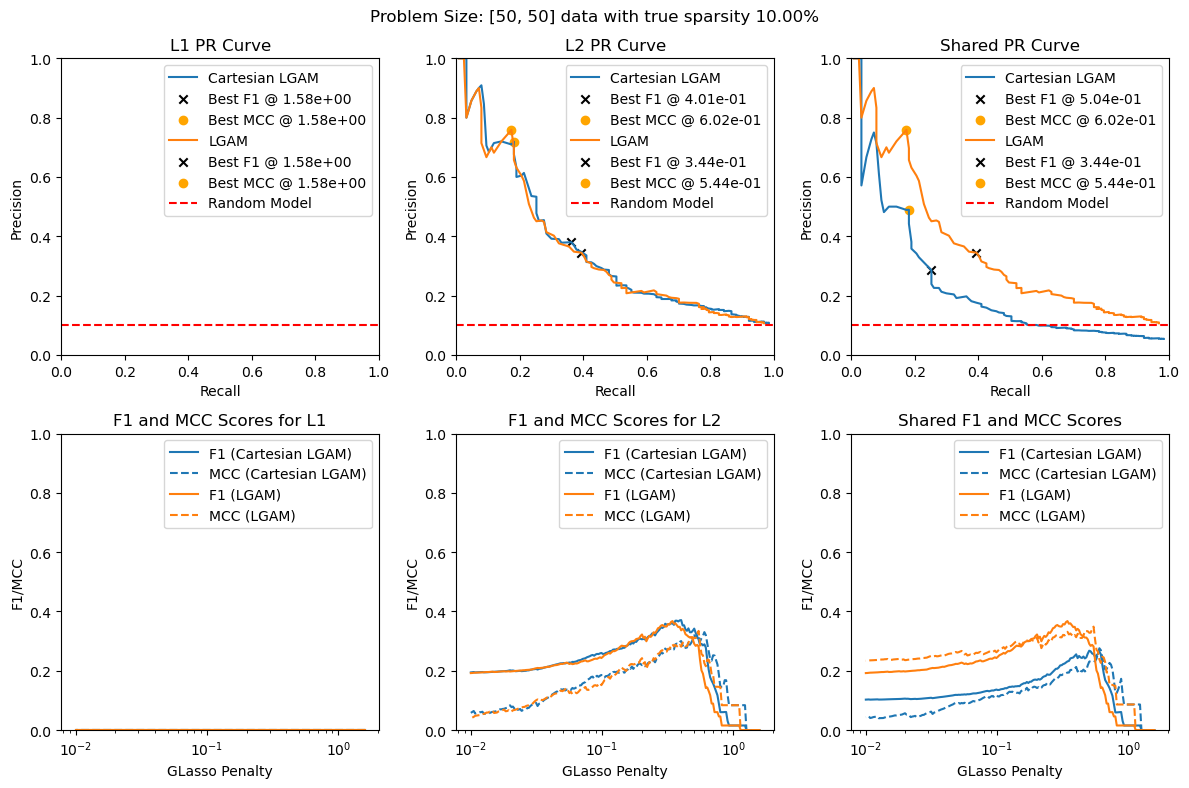

In [27]:
L_estim_patterns = patternify_Ls(Lss)
L_lgam_estim_patterns = patternify_Ls(Lss_lgam)

one_example_prs(
    L_patterns=L_patterns,
    Lss=Lss,
    Lss_lgam=Lss_lgam,
    glassoregs=glassoregs,
    sparsity=sparsity
)
pass

In [28]:
estim_edges = [L[1][np.tril_indices_from(L[1], k=-1)] for L in L_estim_patterns]
baseline_edges = [L[1][np.tril_indices_from(L[1], k=-1)] for L in L_lgam_estim_patterns]
true_edges = L_patterns[1][np.tril_indices_from(L_patterns[1], k=-1)]

precs_clgam = [1] + [precision_score(true_edges, e) for e in estim_edges] + [0]
precs_lgam = [1] + [precision_score(true_edges, e) for e in baseline_edges] + [0]
recs_clgam = [0] + [recall_score(true_edges, e) for e in estim_edges] + [1]
recs_lgam = [0] + [recall_score(true_edges, e) for e in baseline_edges] + [1]

mccs_clgam = [matthews_corrcoef(true_edges, e) for e in estim_edges]
mccs_lgam = [matthews_corrcoef(true_edges, e) for e in baseline_edges]

sort_idxs = np.argsort(recs_clgam)
auc_clgam = auc(np.array(recs_clgam)[sort_idxs], np.array(precs_clgam)[sort_idxs])
sort_idxs = np.argsort(recs_lgam)
auc_lgam = auc(np.array(recs_lgam)[sort_idxs], np.array(precs_lgam)[sort_idxs])

print(
    f"""
    CLGAM:
        Max MCC: {max(mccs_clgam)}
        AUCPR: {auc_clgam}
    LGAM:
        Max MCC: {max(mccs_lgam)}
        AUCPR: {auc_lgam}
    """
)

/Users/baileyandrew/mambaforge/envs/Cartesian-LGAM/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/baileyandrew/mambaforge/envs/Cartesian-LGAM/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/baileyandrew/mambaforge/envs/Cartesian-LGAM/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif


    CLGAM:
        Max MCC: 0.33045854132874347
        AUCPR: 0.35422310534376444
    LGAM:
        Max MCC: 0.3345590409572148
        AUCPR: 0.34803377823878795
    


In [34]:
np.random.seed(0)
dims = (50, 50)
sparsity = 0.1
Ls, L_patterns = generate_Ls(dims, sparsity=sparsity)
Ls[0] = np.eye(dims[0])
L_patterns[0] = Ls[0] != 0
X = generate_sylvester_data(Ls, normalize=True)

D = Dataset(
    dataset={'data': X},
    structure={'data': ('L1', 'L2')}
)

gmgm_estim_edges = []
for resolution in np.linspace(0, 1, 100):
    output = GmGM(
        D,
        to_keep=resolution,
        random_state=0,
        threshold_method='overall'
    )
    gmgm_estim_edges.append([output.precision_matrices[key].toarray() for key in ['L1', 'L2']])
print(len(gmgm_estim_edges))

L_gmgm_estim_patterns = patternify_Ls(gmgm_estim_edges)

estim_edges = [L[1][np.tril_indices_from(L[1])] for L in L_gmgm_estim_patterns]
true_edges = L_patterns[1][np.tril_indices_from(L_patterns[1])]

precs_gmgm = [precision_score(true_edges, e) for e in estim_edges]
recs_gmgm = [recall_score(true_edges, e) for e in estim_edges]

mccs_gmgm = [matthews_corrcoef(true_edges, e) for e in estim_edges]

sort_idxs = np.argsort(recs_gmgm)
auc_gmgm = auc(np.array(recs_gmgm)[sort_idxs], np.array(precs_gmgm)[sort_idxs])

print(
    f"""
    GmGM:
        Max MCC: {max(mccs_gmgm)}
        AUCPR: {auc_gmgm}
    """
)

/Users/baileyandrew/mambaforge/envs/Cartesian-LGAM/lib/python3.12/site-packages/GmGM/GmGM.py:231: UserWarning: This is outdated, will swap to using direct_left_eigenvectors in the future
  warnings.warn("This is outdated, will swap to using direct_left_eigenvectors in the future")


100

    GmGM:
        Max MCC: 0.3282411938179766
        AUCPR: 0.3156877910134667
    


/Users/baileyandrew/mambaforge/envs/Cartesian-LGAM/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [29]:
with open("results/synthetic_independent", "wb") as fp:
    pickle.dump({
        'CLGAM': L_estim_patterns,
        'LGAM': L_lgam_estim_patterns,
        'True': L_patterns
    }, fp)

In [48]:
np.random.seed(0)
dims = (100, 50)
sparsity = 0.1
Ls, L_patterns = generate_Ls(dims, sparsity=sparsity)
Ls[1] = (
    np.diag(np.ones(dims[1]))
    + np.diag(np.ones(dims[1]-1), k=-1)
)

L_patterns[1] = Ls[1] != 0
X = generate_sylvester_data(Ls, normalize=True)

L_init = [np.eye(d) for d in dims]

frobreg = 1/np.prod(dims)**(1/len(dims))
glassoregs = np.logspace(0.9, -2, 1000) # (50, 50)
print("Starting CLGAM")
Lss, _ = warm_start(X, L_init, glassoregs=glassoregs, dont_warm_start=True, verbose=True, max_iter=1000)
print("Starting LGAM on 50-axis")
Lss_lgam, _ = warm_start(X, L_init, glassoregs=glassoregs, sample_axes={0}, dont_warm_start=True, max_iter=1000)
print("Starting LGAM on 100-axis")
Lss_lgam2, _ = warm_start(X, L_init, glassoregs=glassoregs, sample_axes={1}, dont_warm_start=True, max_iter=1000)

Starting CLGAM
L1 Param: 7.943282347242816
L1 Param: 7.890365062067576
L1 Param: 7.837800306104806
L1 Param: 7.785585730843145
L1 Param: 7.733719003416753
L1 Param: 7.682197806501094
L1 Param: 7.631019838209391
L1 Param: 7.580182811989794
L1 Param: 7.529684456523208
L1 Param: 7.479522515621823
L1 Param: 7.429694748128302
L1 Param: 7.3801989278156634
L1 Param: 7.331032843287799
L1 Param: 7.2821942978806895
L1 Param: 7.2336811095642455
L1 Param: 7.1854911108448345
L1 Param: 7.13762214866842
L1 Param: 7.09007208432439
L1 Param: 7.04283879334998
L1 Param: 6.995920165435375
L1 Param: 6.949314104329405
L1 Param: 6.903018527745909
L1 Param: 6.85703136727068
L1 Param: 6.811350568269071
L1 Param: 6.76597408979418
L1 Param: 6.720899904495681
L1 Param: 6.676125998529225
L1 Param: 6.631650371466487
L1 Param: 6.587471036205769
L1 Param: 6.543586018883234
L1 Param: 6.499993358784709
L1 Param: 6.456691108258091
L1 Param: 6.413677332626316
L1 Param: 6.370950110100937
L1 Param: 6.328507531696246
L1 Par

/Users/baileyandrew/Cartesian-LGAM/proximal_gradient_descent.py:43: UserWarning: Alpha too small, stopping line search
  warnings.warn("Alpha too small, stopping line search")


L1 Param: 2.4991815024191952
L1 Param: 2.482532226403706
L1 Param: 2.465993866058637
L1 Param: 2.449565682475824
L1 Param: 2.4332469416696325
L1 Param: 2.417036914544157
L1 Param: 2.400934876860653
L1 Param: 2.3849401092051736
L1 Param: 2.369051896956432
L1 Param: 2.3532695302538675
L1 Param: 2.3375923039659376
L1 Param: 2.3220195176586054
L1 Param: 2.306550475564053
L1 Param: 2.29118448654959
L1 Param: 2.2759208640867783
L1 Param: 2.2607589262207566
L1 Param: 2.2456979955397744
L1 Param: 2.2307373991449233
L1 Param: 2.2158764686200754
L1 Param: 2.201114540002018
L1 Param: 2.1864509537507897
L1 Param: 2.171885054720212
L1 Param: 2.15741619212862
L1 Param: 2.1430437195297856
L1 Param: 2.1287669947840353
L1 Param: 2.114585380029559
L1 Param: 2.1004982416539155
L1 Param: 2.086504950265718
L1 Param: 2.0726048806665194
L1 Param: 2.0587974118228747
L1 Param: 2.045081926838598
L1 Param: 2.0314578129271976
L1 Param: 2.0179244613845007
L1 Param: 2.0044812675614527
L1 Param: 1.9911276308371089
L

/Users/baileyandrew/Cartesian-LGAM/plotting_utilities.py:79: RuntimeWarning: invalid value encountered in divide
  precs = [TPs[i] / (TPs[i] + FPs[i]) for i in range(len(dims))]
/Users/baileyandrew/Cartesian-LGAM/plotting_utilities.py:80: RuntimeWarning: invalid value encountered in divide
  shared_precs = shared_TPs / (shared_TPs + shared_FPs)
/Users/baileyandrew/Cartesian-LGAM/plotting_utilities.py:86: RuntimeWarning: invalid value encountered in divide
  (TPs[i]*TNs[i] - FPs[i]*FNs[i])
/Users/baileyandrew/Cartesian-LGAM/plotting_utilities.py:97: RuntimeWarning: invalid value encountered in divide
  (shared_TPs * shared_TNs - shared_FPs * shared_FNs)


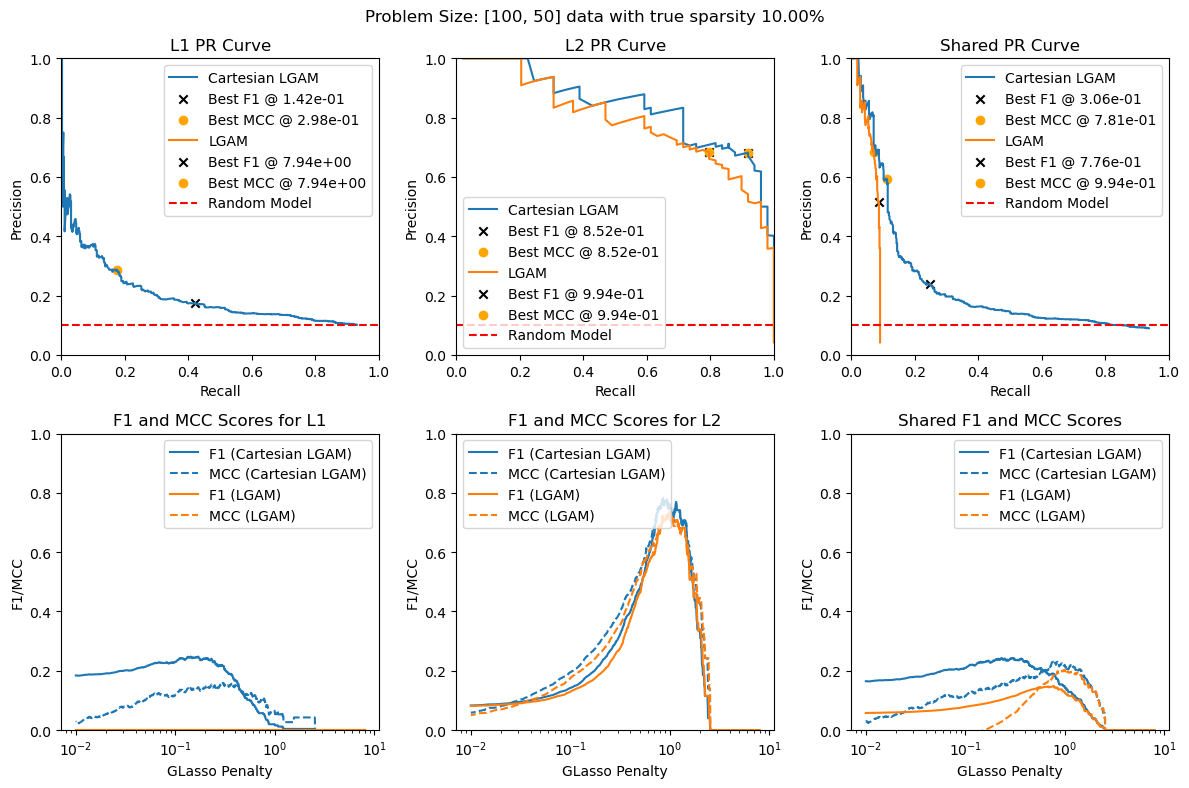

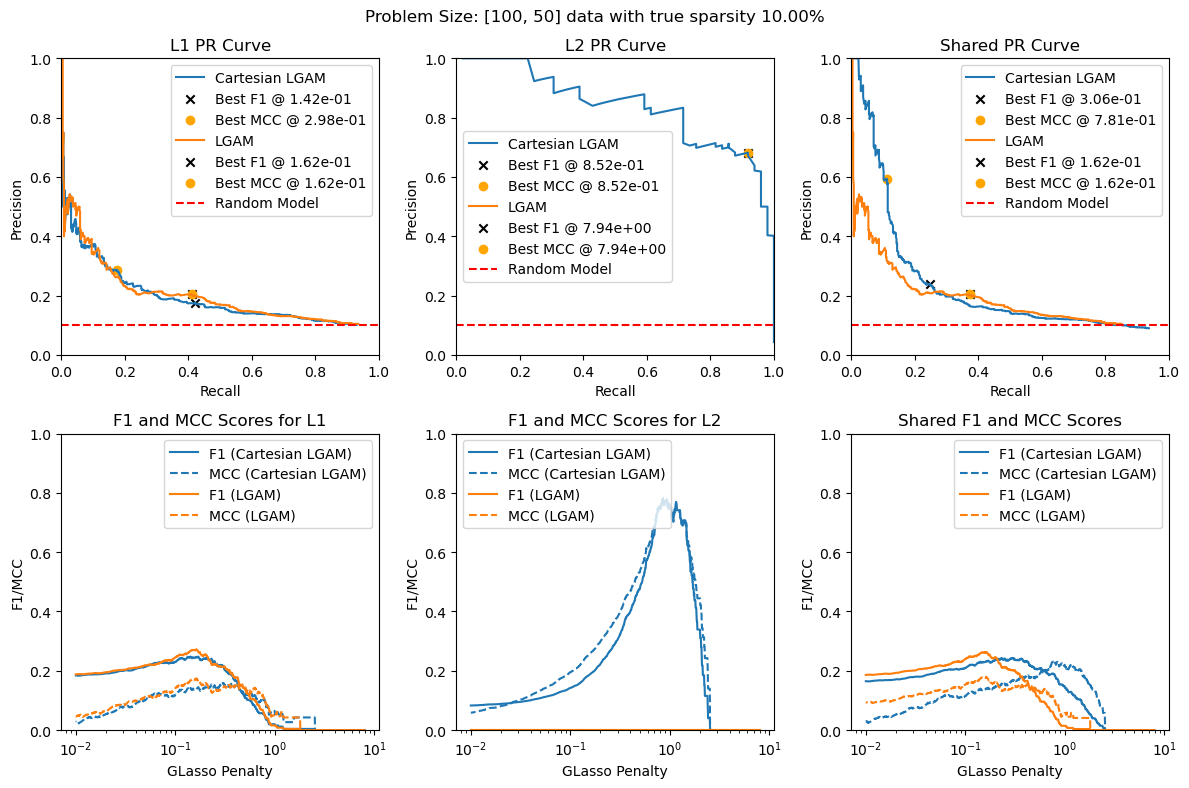

In [49]:
L_estim_patterns = patternify_Ls(Lss)
L_lgam_estim_patterns = patternify_Ls(Lss_lgam)
L_lgam_estim_patterns2 = patternify_Ls(Lss_lgam2)

one_example_prs(
    L_patterns=L_patterns,
    Lss=Lss,
    Lss_lgam=Lss_lgam,
    glassoregs=glassoregs,
    sparsity=sparsity
)
one_example_prs(
    L_patterns=L_patterns,
    Lss=Lss,
    Lss_lgam=Lss_lgam2,
    glassoregs=glassoregs,
    sparsity=sparsity
)
pass

In [50]:
estim_edges = [L[1][np.tril_indices_from(L[1], k=-1)] for L in L_estim_patterns]
baseline_edges = [L[1][np.tril_indices_from(L[1], k=-1)] for L in L_lgam_estim_patterns]
true_edges = L_patterns[1][np.tril_indices_from(L_patterns[1], k=-1)]

precs_clgam = [1] + [precision_score(true_edges, e) for e in estim_edges] + [0]
precs_lgam = [1] + [precision_score(true_edges, e) for e in baseline_edges] + [0]
recs_clgam = [0] + [recall_score(true_edges, e) for e in estim_edges] + [1]
recs_lgam = [0] + [recall_score(true_edges, e) for e in baseline_edges] + [1]

mccs_clgam = [matthews_corrcoef(true_edges, e) for e in estim_edges]
mccs_lgam = [matthews_corrcoef(true_edges, e) for e in baseline_edges]

sort_idxs = np.argsort(recs_clgam)
auc_clgam = auc(np.array(recs_clgam)[sort_idxs], np.array(precs_clgam)[sort_idxs])
sort_idxs = np.argsort(recs_lgam)
auc_lgam = auc(np.array(recs_lgam)[sort_idxs], np.array(precs_lgam)[sort_idxs])

print(
    f"""
    CLGAM:
        Max MCC: {max(mccs_clgam)}
        AUCPR: {auc_clgam}
    LGAM:
        Max MCC: {max(mccs_lgam)}
        AUCPR: {auc_lgam}
    """
)

/Users/baileyandrew/mambaforge/envs/Cartesian-LGAM/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/baileyandrew/mambaforge/envs/Cartesian-LGAM/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/baileyandrew/mambaforge/envs/Cartesian-LGAM/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif


    CLGAM:
        Max MCC: 0.7815857875131862
        AUCPR: 0.8234150582527684
    LGAM:
        Max MCC: 0.7262367320066132
        AUCPR: 0.7784684832318219
    


In [35]:
np.random.seed(0)
dims = (100, 50)
sparsity = 0.1
Ls, L_patterns = generate_Ls(dims, sparsity=sparsity)
Ls[1] = (
    np.diag(np.ones(dims[1]))
    + np.diag(np.ones(dims[1]-1), k=-1)
)

L_patterns[1] = Ls[1] != 0
X = generate_sylvester_data(Ls, normalize=True)

D = Dataset(
    dataset={'data': X},
    structure={'data': ('L1', 'L2')}
)

gmgm_estim_edges = []
for resolution in np.linspace(0, 1, 100):
    output = GmGM(
        D,
        to_keep=resolution,
        random_state=0,
        threshold_method='overall'
    )
    gmgm_estim_edges.append([output.precision_matrices[key].toarray() for key in ['L1', 'L2']])
print(len(gmgm_estim_edges))

L_gmgm_estim_patterns = patternify_Ls(gmgm_estim_edges)

estim_edges = [L[1][np.tril_indices_from(L[1])] for L in L_gmgm_estim_patterns]
true_edges = L_patterns[1][np.tril_indices_from(L_patterns[1])]

precs_gmgm = [precision_score(true_edges, e) for e in estim_edges]
recs_gmgm = [recall_score(true_edges, e) for e in estim_edges]

mccs_gmgm = [matthews_corrcoef(true_edges, e) for e in estim_edges]

sort_idxs = np.argsort(recs_gmgm)
auc_gmgm = auc(np.array(recs_gmgm)[sort_idxs], np.array(precs_gmgm)[sort_idxs])

print(
    f"""
    GmGM:
        Max MCC: {max(mccs_gmgm)}
        AUCPR: {auc_gmgm}
    """
)

/Users/baileyandrew/mambaforge/envs/Cartesian-LGAM/lib/python3.12/site-packages/GmGM/GmGM.py:231: UserWarning: This is outdated, will swap to using direct_left_eigenvectors in the future
  warnings.warn("This is outdated, will swap to using direct_left_eigenvectors in the future")


100

    GmGM:
        Max MCC: 0.3688727362271066
        AUCPR: 0.24691983035200477
    


/Users/baileyandrew/mambaforge/envs/Cartesian-LGAM/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [51]:
estim_edges = [L[0][np.tril_indices_from(L[0], k=-1)] for L in L_estim_patterns]
baseline_edges = [L[0][np.tril_indices_from(L[0], k=-1)] for L in L_lgam_estim_patterns2]
true_edges = L_patterns[0][np.tril_indices_from(L_patterns[0], k=-1)]

precs_clgam = [1] + [precision_score(true_edges, e) for e in estim_edges] + [0]
precs_lgam = [1] + [precision_score(true_edges, e) for e in baseline_edges] + [0]
recs_clgam = [0] + [recall_score(true_edges, e) for e in estim_edges] + [1]
recs_lgam = [0] + [recall_score(true_edges, e) for e in baseline_edges] + [1]

mccs_clgam = [matthews_corrcoef(true_edges, e) for e in estim_edges]
mccs_lgam = [matthews_corrcoef(true_edges, e) for e in baseline_edges]

sort_idxs = np.argsort(recs_clgam)
auc_clgam = auc(np.array(recs_clgam)[sort_idxs], np.array(precs_clgam)[sort_idxs])
sort_idxs = np.argsort(recs_lgam)
auc_lgam = auc(np.array(recs_lgam)[sort_idxs], np.array(precs_lgam)[sort_idxs])

print(
    f"""
    CLGAM:
        Max MCC: {max(mccs_clgam)}
        AUCPR: {auc_clgam}
    LGAM:
        Max MCC: {max(mccs_lgam)}
        AUCPR: {auc_lgam}
    """
)

/Users/baileyandrew/mambaforge/envs/Cartesian-LGAM/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/baileyandrew/mambaforge/envs/Cartesian-LGAM/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/baileyandrew/mambaforge/envs/Cartesian-LGAM/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif


    CLGAM:
        Max MCC: 0.15885917424528595
        AUCPR: 0.19004128634332407
    LGAM:
        Max MCC: 0.17485621862020567
        AUCPR: 0.1968919738410855
    


In [36]:
np.random.seed(0)
dims = (100, 50)
sparsity = 0.1
Ls, L_patterns = generate_Ls(dims, sparsity=sparsity)
Ls[1] = (
    np.diag(np.ones(dims[1]))
    + np.diag(np.ones(dims[1]-1), k=-1)
)

L_patterns[1] = Ls[1] != 0
X = generate_sylvester_data(Ls, normalize=True)

D = Dataset(
    dataset={'data': X},
    structure={'data': ('L1', 'L2')}
)

gmgm_estim_edges = []
for resolution in np.linspace(0, 1, 100):
    output = GmGM(
        D,
        to_keep=resolution,
        random_state=0,
        threshold_method='overall'
    )
    gmgm_estim_edges.append([output.precision_matrices[key].toarray() for key in ['L1', 'L2']])
print(len(gmgm_estim_edges))

L_gmgm_estim_patterns = patternify_Ls(gmgm_estim_edges)

estim_edges = [L[0][np.tril_indices_from(L[0])] for L in L_gmgm_estim_patterns]
true_edges = L_patterns[0][np.tril_indices_from(L_patterns[0])]

precs_gmgm = [precision_score(true_edges, e) for e in estim_edges]
recs_gmgm = [recall_score(true_edges, e) for e in estim_edges]

mccs_gmgm = [matthews_corrcoef(true_edges, e) for e in estim_edges]

sort_idxs = np.argsort(recs_gmgm)
auc_gmgm = auc(np.array(recs_gmgm)[sort_idxs], np.array(precs_gmgm)[sort_idxs])

print(
    f"""
    GmGM:
        Max MCC: {max(mccs_gmgm)}
        AUCPR: {auc_gmgm}
    """
)

/Users/baileyandrew/mambaforge/envs/Cartesian-LGAM/lib/python3.12/site-packages/GmGM/GmGM.py:231: UserWarning: This is outdated, will swap to using direct_left_eigenvectors in the future
  warnings.warn("This is outdated, will swap to using direct_left_eigenvectors in the future")


100


/Users/baileyandrew/mambaforge/envs/Cartesian-LGAM/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



    GmGM:
        Max MCC: 0.13284102148444266
        AUCPR: 0.16412335941438905
    


In [52]:
with open("results/synthetic_lopsided_ar1", "wb") as fp:
    pickle.dump({
        'CLGAM': L_estim_patterns,
        'LGAM[1]': L_lgam_estim_patterns,
        'LGAM[2]': L_lgam_estim_patterns2,
        'True': L_patterns
    }, fp)

In [54]:
np.random.seed(0)
dims = (100, 50)
sparsity = 0.1
Ls, L_patterns = generate_Ls(dims, sparsity=sparsity)
Ls[0] = (
    np.diag(np.ones(dims[0]))
    + np.diag(np.ones(dims[0]-1), k=-1)
)

L_patterns[0] = Ls[0] != 0
X = generate_sylvester_data(Ls, normalize=True)

L_init = [np.eye(d) for d in dims]

frobreg = 1/np.prod(dims)**(1/len(dims))
glassoregs = np.logspace(0.9, -2, 1000) # (50, 50)
print("Starting CLGAM")
Lss, _ = warm_start(X, L_init, glassoregs=glassoregs, dont_warm_start=True, verbose=True, max_iter=1000)
print("Starting LGAM on 50-axis")
Lss_lgam, _ = warm_start(X, L_init, glassoregs=glassoregs, sample_axes={0}, dont_warm_start=True, max_iter=1000)
print("Starting LGAM on 100-axis")
Lss_lgam2, _ = warm_start(X, L_init, glassoregs=glassoregs, sample_axes={1}, dont_warm_start=True, max_iter=1000)

Starting CLGAM
L1 Param: 7.943282347242816
L1 Param: 7.890365062067576
L1 Param: 7.837800306104806
L1 Param: 7.785585730843145
L1 Param: 7.733719003416753
L1 Param: 7.682197806501094
L1 Param: 7.631019838209391
L1 Param: 7.580182811989794
L1 Param: 7.529684456523208
L1 Param: 7.479522515621823
L1 Param: 7.429694748128302
L1 Param: 7.3801989278156634
L1 Param: 7.331032843287799
L1 Param: 7.2821942978806895
L1 Param: 7.2336811095642455
L1 Param: 7.1854911108448345
L1 Param: 7.13762214866842
L1 Param: 7.09007208432439
L1 Param: 7.04283879334998
L1 Param: 6.995920165435375
L1 Param: 6.949314104329405
L1 Param: 6.903018527745909
L1 Param: 6.85703136727068
L1 Param: 6.811350568269071
L1 Param: 6.76597408979418
L1 Param: 6.720899904495681
L1 Param: 6.676125998529225
L1 Param: 6.631650371466487
L1 Param: 6.587471036205769
L1 Param: 6.543586018883234
L1 Param: 6.499993358784709
L1 Param: 6.456691108258091
L1 Param: 6.413677332626316
L1 Param: 6.370950110100937
L1 Param: 6.328507531696246
L1 Par

/Users/baileyandrew/Cartesian-LGAM/proximal_gradient_descent.py:43: UserWarning: Alpha too small, stopping line search
  warnings.warn("Alpha too small, stopping line search")


L1 Param: 2.369051896956432
L1 Param: 2.3532695302538675
L1 Param: 2.3375923039659376
L1 Param: 2.3220195176586054
L1 Param: 2.306550475564053
L1 Param: 2.29118448654959
L1 Param: 2.2759208640867783
L1 Param: 2.2607589262207566
L1 Param: 2.2456979955397744
L1 Param: 2.2307373991449233
L1 Param: 2.2158764686200754
L1 Param: 2.201114540002018
L1 Param: 2.1864509537507897
L1 Param: 2.171885054720212
L1 Param: 2.15741619212862
L1 Param: 2.1430437195297856
L1 Param: 2.1287669947840353
L1 Param: 2.114585380029559
L1 Param: 2.1004982416539155
L1 Param: 2.086504950265718
L1 Param: 2.0726048806665194
L1 Param: 2.0587974118228747
L1 Param: 2.045081926838598
L1 Param: 2.0314578129271976
L1 Param: 2.0179244613845007
L1 Param: 2.0044812675614527
L1 Param: 1.9911276308371089
L1 Param: 1.9778629545917925
L1 Param: 1.964686646180446
L1 Param: 1.9515981169061458
L1 Param: 1.9385967819938057
L1 Param: 1.9256820605640455
L1 Param: 1.9128533756072428
L1 Param: 1.9001101539577487
L1 Param: 1.88745182626828

/Users/baileyandrew/Cartesian-LGAM/plotting_utilities.py:79: RuntimeWarning: invalid value encountered in divide
  precs = [TPs[i] / (TPs[i] + FPs[i]) for i in range(len(dims))]
/Users/baileyandrew/Cartesian-LGAM/plotting_utilities.py:80: RuntimeWarning: invalid value encountered in divide
  shared_precs = shared_TPs / (shared_TPs + shared_FPs)
/Users/baileyandrew/Cartesian-LGAM/plotting_utilities.py:86: RuntimeWarning: invalid value encountered in divide
  (TPs[i]*TNs[i] - FPs[i]*FNs[i])
/Users/baileyandrew/Cartesian-LGAM/plotting_utilities.py:97: RuntimeWarning: invalid value encountered in divide
  (shared_TPs * shared_TNs - shared_FPs * shared_FNs)


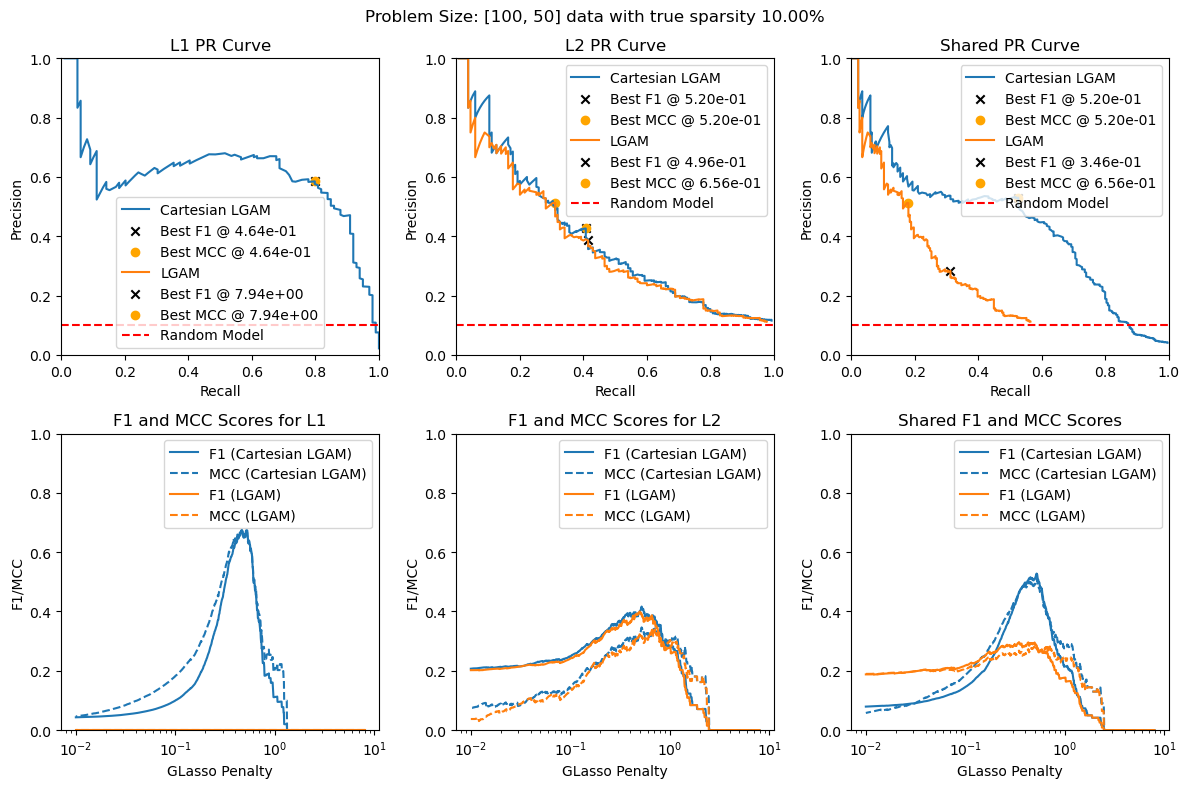

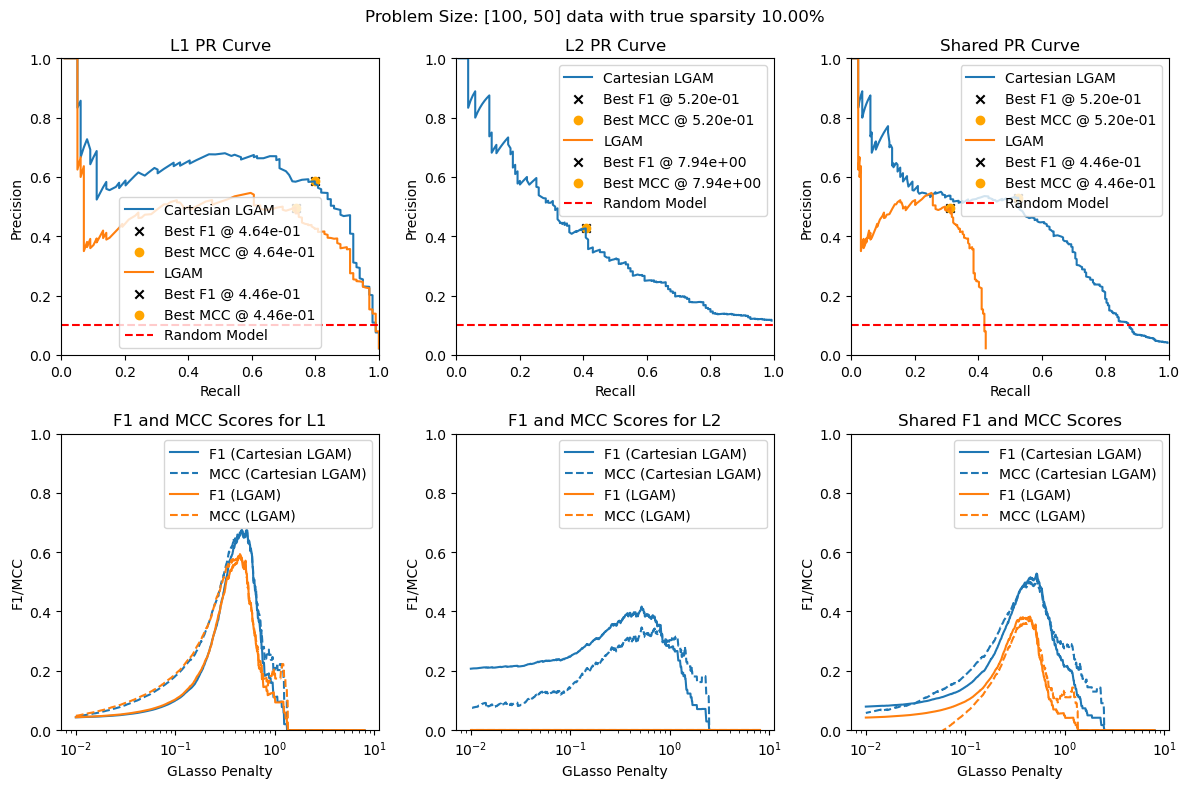

In [55]:
L_estim_patterns = patternify_Ls(Lss)
L_lgam_estim_patterns = patternify_Ls(Lss_lgam)
L_lgam_estim_patterns2 = patternify_Ls(Lss_lgam2)

one_example_prs(
    L_patterns=L_patterns,
    Lss=Lss,
    Lss_lgam=Lss_lgam,
    glassoregs=glassoregs,
    sparsity=sparsity
)
one_example_prs(
    L_patterns=L_patterns,
    Lss=Lss,
    Lss_lgam=Lss_lgam2,
    glassoregs=glassoregs,
    sparsity=sparsity
)
pass

In [56]:
estim_edges = [L[1][np.tril_indices_from(L[1], k=-1)] for L in L_estim_patterns]
baseline_edges = [L[1][np.tril_indices_from(L[1], k=-1)] for L in L_lgam_estim_patterns]
true_edges = L_patterns[1][np.tril_indices_from(L_patterns[1], k=-1)]

precs_clgam = [1] + [precision_score(true_edges, e) for e in estim_edges] + [0]
precs_lgam = [1] + [precision_score(true_edges, e) for e in baseline_edges] + [0]
recs_clgam = [0] + [recall_score(true_edges, e) for e in estim_edges] + [1]
recs_lgam = [0] + [recall_score(true_edges, e) for e in baseline_edges] + [1]

mccs_clgam = [matthews_corrcoef(true_edges, e) for e in estim_edges]
mccs_lgam = [matthews_corrcoef(true_edges, e) for e in baseline_edges]

sort_idxs = np.argsort(recs_clgam)
auc_clgam = auc(np.array(recs_clgam)[sort_idxs], np.array(precs_clgam)[sort_idxs])
sort_idxs = np.argsort(recs_lgam)
auc_lgam = auc(np.array(recs_lgam)[sort_idxs], np.array(precs_lgam)[sort_idxs])

print(
    f"""
    CLGAM:
        Max MCC: {max(mccs_clgam)}
        AUCPR: {auc_clgam}
    LGAM:
        Max MCC: {max(mccs_lgam)}
        AUCPR: {auc_lgam}
    """
)

/Users/baileyandrew/mambaforge/envs/Cartesian-LGAM/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/baileyandrew/mambaforge/envs/Cartesian-LGAM/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/baileyandrew/mambaforge/envs/Cartesian-LGAM/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif


    CLGAM:
        Max MCC: 0.34637151107671627
        AUCPR: 0.3864177767417818
    LGAM:
        Max MCC: 0.34383979561964745
        AUCPR: 0.3668646162250956
    


In [38]:
np.random.seed(0)
dims = (100, 50)
sparsity = 0.1
Ls, L_patterns = generate_Ls(dims, sparsity=sparsity)
Ls[0] = (
    np.diag(np.ones(dims[0]))
    + np.diag(np.ones(dims[0]-1), k=-1)
)

L_patterns[0] = Ls[0] != 0
X = generate_sylvester_data(Ls, normalize=True)

D = Dataset(
    dataset={'data': X},
    structure={'data': ('L1', 'L2')}
)

gmgm_estim_edges = []
for resolution in np.linspace(0, 1, 100):
    output = GmGM(
        D,
        to_keep=resolution,
        random_state=0,
        threshold_method='overall'
    )
    gmgm_estim_edges.append([output.precision_matrices[key].toarray() for key in ['L1', 'L2']])
print(len(gmgm_estim_edges))

L_gmgm_estim_patterns = patternify_Ls(gmgm_estim_edges)

estim_edges = [L[1][np.tril_indices_from(L[1])] for L in L_gmgm_estim_patterns]
true_edges = L_patterns[1][np.tril_indices_from(L_patterns[1])]

precs_gmgm = [precision_score(true_edges, e) for e in estim_edges]
recs_gmgm = [recall_score(true_edges, e) for e in estim_edges]

mccs_gmgm = [matthews_corrcoef(true_edges, e) for e in estim_edges]

sort_idxs = np.argsort(recs_gmgm)
auc_gmgm = auc(np.array(recs_gmgm)[sort_idxs], np.array(precs_gmgm)[sort_idxs])

print(
    f"""
    GmGM:
        Max MCC: {max(mccs_gmgm)}
        AUCPR: {auc_gmgm}
    """
)

/Users/baileyandrew/mambaforge/envs/Cartesian-LGAM/lib/python3.12/site-packages/GmGM/GmGM.py:231: UserWarning: This is outdated, will swap to using direct_left_eigenvectors in the future
  warnings.warn("This is outdated, will swap to using direct_left_eigenvectors in the future")


100

    GmGM:
        Max MCC: 0.2745899463726543
        AUCPR: 0.2879999761818627
    


/Users/baileyandrew/mambaforge/envs/Cartesian-LGAM/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [57]:
estim_edges = [L[0][np.tril_indices_from(L[0], k=-1)] for L in L_estim_patterns]
baseline_edges = [L[0][np.tril_indices_from(L[0], k=-1)] for L in L_lgam_estim_patterns2]
true_edges = L_patterns[0][np.tril_indices_from(L_patterns[0], k=-1)]

precs_clgam = [1] + [precision_score(true_edges, e) for e in estim_edges] + [0]
precs_lgam = [1] + [precision_score(true_edges, e) for e in baseline_edges] + [0]
recs_clgam = [0] + [recall_score(true_edges, e) for e in estim_edges] + [1]
recs_lgam = [0] + [recall_score(true_edges, e) for e in baseline_edges] + [1]

mccs_clgam = [matthews_corrcoef(true_edges, e) for e in estim_edges]
mccs_lgam = [matthews_corrcoef(true_edges, e) for e in baseline_edges]

sort_idxs = np.argsort(recs_clgam)
auc_clgam = auc(np.array(recs_clgam)[sort_idxs], np.array(precs_clgam)[sort_idxs])
sort_idxs = np.argsort(recs_lgam)
auc_lgam = auc(np.array(recs_lgam)[sort_idxs], np.array(precs_lgam)[sort_idxs])

print(
    f"""
    CLGAM:
        Max MCC: {max(mccs_clgam)}
        AUCPR: {auc_clgam}
    LGAM:
        Max MCC: {max(mccs_lgam)}
        AUCPR: {auc_lgam}
    """
)

/Users/baileyandrew/mambaforge/envs/Cartesian-LGAM/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/baileyandrew/mambaforge/envs/Cartesian-LGAM/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/baileyandrew/mambaforge/envs/Cartesian-LGAM/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif


    CLGAM:
        Max MCC: 0.6759763040918698
        AUCPR: 0.5975285782115358
    LGAM:
        Max MCC: 0.5955622151985805
        AUCPR: 0.4677829759318718
    


In [39]:
np.random.seed(0)
dims = (100, 50)
sparsity = 0.1
Ls, L_patterns = generate_Ls(dims, sparsity=sparsity)
Ls[0] = (
    np.diag(np.ones(dims[0]))
    + np.diag(np.ones(dims[0]-1), k=-1)
)

L_patterns[0] = Ls[0] != 0
X = generate_sylvester_data(Ls, normalize=True)

D = Dataset(
    dataset={'data': X},
    structure={'data': ('L1', 'L2')}
)

gmgm_estim_edges = []
for resolution in np.linspace(0, 1, 100):
    output = GmGM(
        D,
        to_keep=resolution,
        random_state=0,
        threshold_method='overall'
    )
    gmgm_estim_edges.append([output.precision_matrices[key].toarray() for key in ['L1', 'L2']])
print(len(gmgm_estim_edges))

L_gmgm_estim_patterns = patternify_Ls(gmgm_estim_edges)

estim_edges = [L[0][np.tril_indices_from(L[0])] for L in L_gmgm_estim_patterns]
true_edges = L_patterns[0][np.tril_indices_from(L_patterns[0])]

precs_gmgm = [precision_score(true_edges, e) for e in estim_edges]
recs_gmgm = [recall_score(true_edges, e) for e in estim_edges]

mccs_gmgm = [matthews_corrcoef(true_edges, e) for e in estim_edges]

sort_idxs = np.argsort(recs_gmgm)
auc_gmgm = auc(np.array(recs_gmgm)[sort_idxs], np.array(precs_gmgm)[sort_idxs])

print(
    f"""
    GmGM:
        Max MCC: {max(mccs_gmgm)}
        AUCPR: {auc_gmgm}
    """
)

/Users/baileyandrew/mambaforge/envs/Cartesian-LGAM/lib/python3.12/site-packages/GmGM/GmGM.py:231: UserWarning: This is outdated, will swap to using direct_left_eigenvectors in the future
  warnings.warn("This is outdated, will swap to using direct_left_eigenvectors in the future")


100


/Users/baileyandrew/mambaforge/envs/Cartesian-LGAM/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



    GmGM:
        Max MCC: 0.30852405649910114
        AUCPR: 0.1380158059405797
    


In [58]:
with open("results/synthetic_lopsided_ar1_flipped", "wb") as fp:
    pickle.dump({
        'CLGAM': L_estim_patterns,
        'LGAM[1]': L_lgam_estim_patterns,
        'LGAM[2]': L_lgam_estim_patterns2,
        'True': L_patterns
    }, fp)

In [61]:
np.random.seed(0)
dims = (60, 60, 60)
sparsity = 0.1
Ls, L_patterns = generate_Ls(dims, sparsity=sparsity)
X = generate_sylvester_data(Ls, normalize=True)

L_init = [np.eye(d) for d in dims]

frobreg = 1/np.prod(dims)**(1/len(dims))
glassoregs = np.logspace(0.5, -2, 100) # (50, 50)
Lss, _ = warm_start(X, L_init, glassoregs=glassoregs, dont_warm_start=True, verbose=True)
print("Starting LGAM")
Lss_lgam, _ = warm_start(X, L_init, glassoregs=glassoregs, sample_axes={0, 1}, dont_warm_start=True)

L1 Param: 3.1622776601683795
L1 Param: 2.9836472402833394


/Users/baileyandrew/Cartesian-LGAM/proximal_gradient_descent.py:43: UserWarning: Alpha too small, stopping line search
  warnings.warn("Alpha too small, stopping line search")


L1 Param: 2.8151072774477304
L1 Param: 2.6560877829466865
L1 Param: 2.5060509655300813
L1 Param: 2.364489412645407
L1 Param: 2.230924374408983
L1 Param: 2.1049041445120205
L1 Param: 1.9860025325859119
L1 Param: 1.8738174228603839
L1 Param: 1.7679694142400304
L1 Param: 1.6681005372000588
L1 Param: 1.5738730431619035
L1 Param: 1.484968262254465
L1 Param: 1.4010855255980168
L1 Param: 1.321941148466029
L1 Param: 1.2472674708860454
L1 Param: 1.1768119524349985
L1 Param: 1.110336318167638
L1 Param: 1.0476157527896648
L1 Param: 0.9884381403503333
L1 Param: 0.9326033468832199
L1 Param: 0.8799225435691069
L1 Param: 0.8302175681319746
L1 Param: 0.7833203223083882
L1 Param: 0.739072203352578
L1 Param: 0.697323567654597
L1 Param: 0.6579332246575681
L1 Param: 0.6207679593624762
L1 Param: 0.5857020818056667
L1 Param: 0.552617001985409
L1 Param: 0.5214008287999686
L1 Param: 0.4919479916408219
L1 Param: 0.46415888336127786
L1 Param: 0.4379395234130494
L1 Param: 0.41320124001153363
L1 Param: 0.38986037

/Users/baileyandrew/Cartesian-LGAM/plotting_utilities.py:79: RuntimeWarning: invalid value encountered in divide
  precs = [TPs[i] / (TPs[i] + FPs[i]) for i in range(len(dims))]
/Users/baileyandrew/Cartesian-LGAM/plotting_utilities.py:86: RuntimeWarning: invalid value encountered in divide
  (TPs[i]*TNs[i] - FPs[i]*FNs[i])


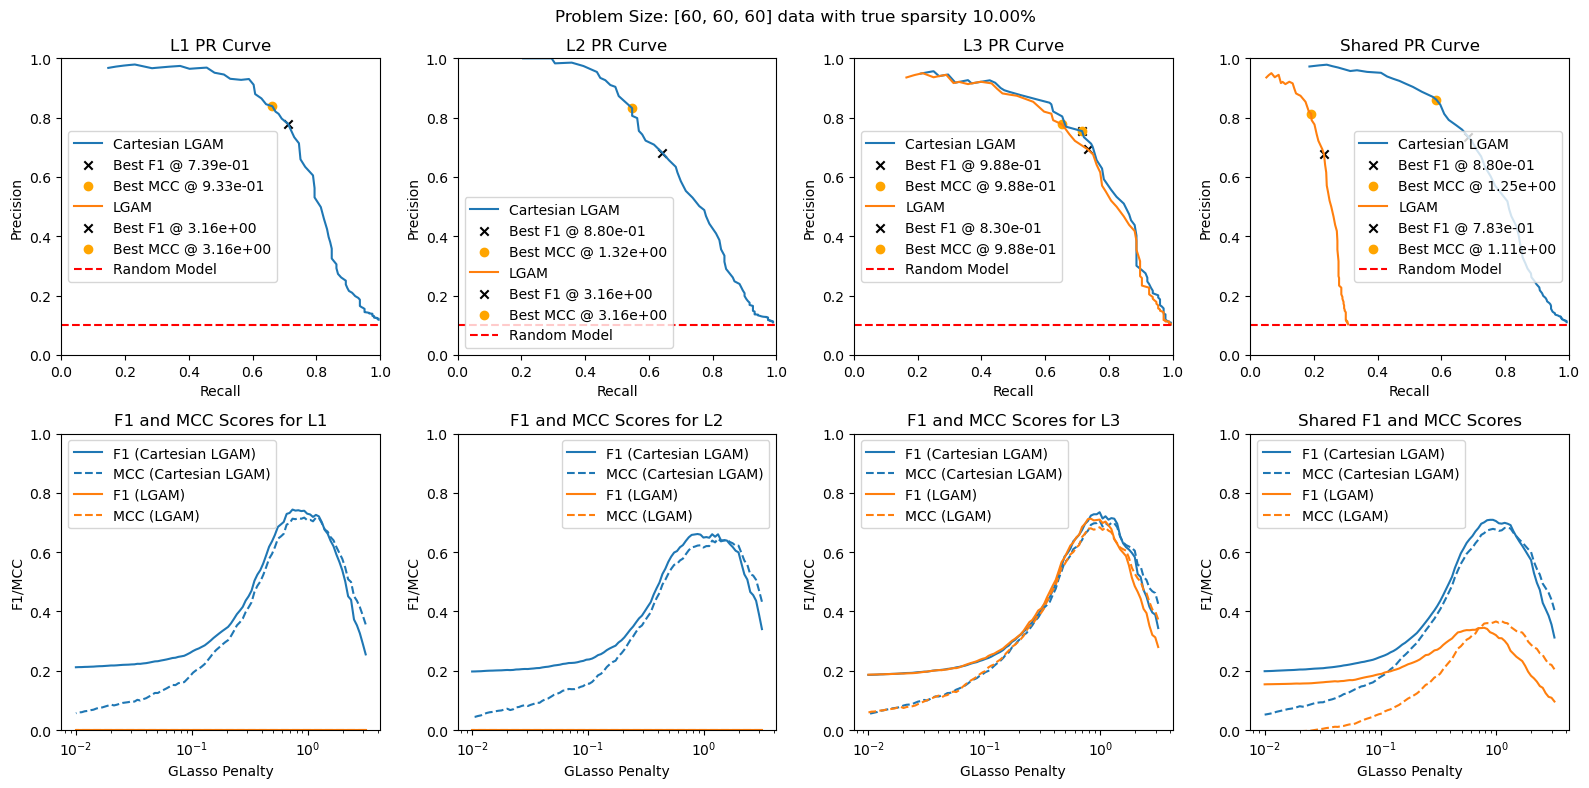

In [62]:
L_estim_patterns = patternify_Ls(Lss)
L_lgam_estim_patterns = patternify_Ls(Lss_lgam)

one_example_prs(
    L_patterns=L_patterns,
    Lss=Lss,
    Lss_lgam=Lss_lgam,
    glassoregs=glassoregs,
    sparsity=sparsity
)
pass

In [63]:
estim_edges = [L[2][np.tril_indices_from(L[2], k=-1)] for L in L_estim_patterns]
baseline_edges = [L[2][np.tril_indices_from(L[2], k=-1)] for L in L_lgam_estim_patterns]
true_edges = L_patterns[2][np.tril_indices_from(L_patterns[2], k=-1)]

# They didn't quite reach the "fully regularized" or "fully unregularized" stage for this experiment
precs_clgam = [1] + [precision_score(true_edges, e) for e in estim_edges] + [0]
precs_lgam = [1] + [precision_score(true_edges, e) for e in baseline_edges] + [0]
recs_clgam = [0] + [recall_score(true_edges, e) for e in estim_edges] + [1]
recs_lgam = [0] + [recall_score(true_edges, e) for e in baseline_edges] + [1]

mccs_clgam = [matthews_corrcoef(true_edges, e) for e in estim_edges]
mccs_lgam = [matthews_corrcoef(true_edges, e) for e in baseline_edges]

sort_idxs = np.argsort(recs_clgam)
auc_clgam = auc(np.array(recs_clgam)[sort_idxs], np.array(precs_clgam)[sort_idxs])
sort_idxs = np.argsort(recs_lgam)
auc_lgam = auc(np.array(recs_lgam)[sort_idxs], np.array(precs_lgam)[sort_idxs])

print(
    f"""
    CLGAM:
        Max MCC: {max(mccs_clgam)}
        AUCPR: {auc_clgam}
    LGAM:
        Max MCC: {max(mccs_lgam)}
        AUCPR: {auc_lgam}
    """
)


    CLGAM:
        Max MCC: 0.706549625325271
        AUCPR: 0.7748480473009154
    LGAM:
        Max MCC: 0.6839848395716652
        AUCPR: 0.7577514581862528
    


In [42]:
np.random.seed(0)
dims = (60, 60, 60)
sparsity = 0.1
Ls, L_patterns = generate_Ls(dims, sparsity=sparsity)
X = generate_sylvester_data(Ls, normalize=True)

D = Dataset(
    dataset={'data': X},
    structure={'data': ('L1', 'L2', 'L3')}
)

gmgm_estim_edges = []
for resolution in np.linspace(0, 1, 100):
    output = GmGM(
        D,
        to_keep=resolution,
        random_state=0,
        threshold_method='overall'
    )
    gmgm_estim_edges.append([output.precision_matrices[key].toarray() for key in ['L1', 'L2', 'L3']])
print(len(gmgm_estim_edges))

L_gmgm_estim_patterns = patternify_Ls(gmgm_estim_edges)

estim_edges = [L[2][np.tril_indices_from(L[2])] for L in L_gmgm_estim_patterns]
true_edges = L_patterns[2][np.tril_indices_from(L_patterns[2])]

precs_gmgm = [precision_score(true_edges, e) for e in estim_edges]
recs_gmgm = [recall_score(true_edges, e) for e in estim_edges]

mccs_gmgm = [matthews_corrcoef(true_edges, e) for e in estim_edges]

sort_idxs = np.argsort(recs_gmgm)
auc_gmgm = auc(np.array(recs_gmgm)[sort_idxs], np.array(precs_gmgm)[sort_idxs])

print(
    f"""
    GmGM:
        Max MCC: {max(mccs_gmgm)}
        AUCPR: {auc_gmgm}
    """
)

/Users/baileyandrew/mambaforge/envs/Cartesian-LGAM/lib/python3.12/site-packages/GmGM/GmGM.py:231: UserWarning: This is outdated, will swap to using direct_left_eigenvectors in the future
  warnings.warn("This is outdated, will swap to using direct_left_eigenvectors in the future")


100

    GmGM:
        Max MCC: 0.6497519279169246
        AUCPR: 0.6880266222514162
    


/Users/baileyandrew/mambaforge/envs/Cartesian-LGAM/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [64]:
with open("results/synthetic_tensor_large", "wb") as fp:
    pickle.dump({
        'CLGAM': L_estim_patterns,
        'LGAM': L_lgam_estim_patterns,
        'True': L_patterns
    }, fp)

In [ ]:
np.random.seed(0)
dims = (50, 50)
sparsity = 0.1
Ls, L_patterns = generate_Ls(dims, sparsity=sparsity)
X = generate_sylvester_data(Ls, normalize=True, source_distribution=np.random.poisson)

L_init = [np.eye(d) for d in dims]

frobreg = 1/np.prod(dims)**(1/len(dims))
glassoregs = np.logspace(0.5, -2, 500) # (50, 50)
Lss, _ = warm_start(X, L_init, glassoregs=glassoregs, dont_warm_start=True, verbose=True)
Lss_lgam, _ = warm_start(X, L_init, glassoregs=glassoregs, sample_axes={0}, dont_warm_start=True, verbose=True)

L1 Param: 100.0
L1 Param: 10.0
L1 Param: 1.0
L1 Param: 0.1
L1 Param: 0.01
L1 Param: 100.0
L1 Param: 10.0
L1 Param: 1.0
L1 Param: 0.1
L1 Param: 0.01


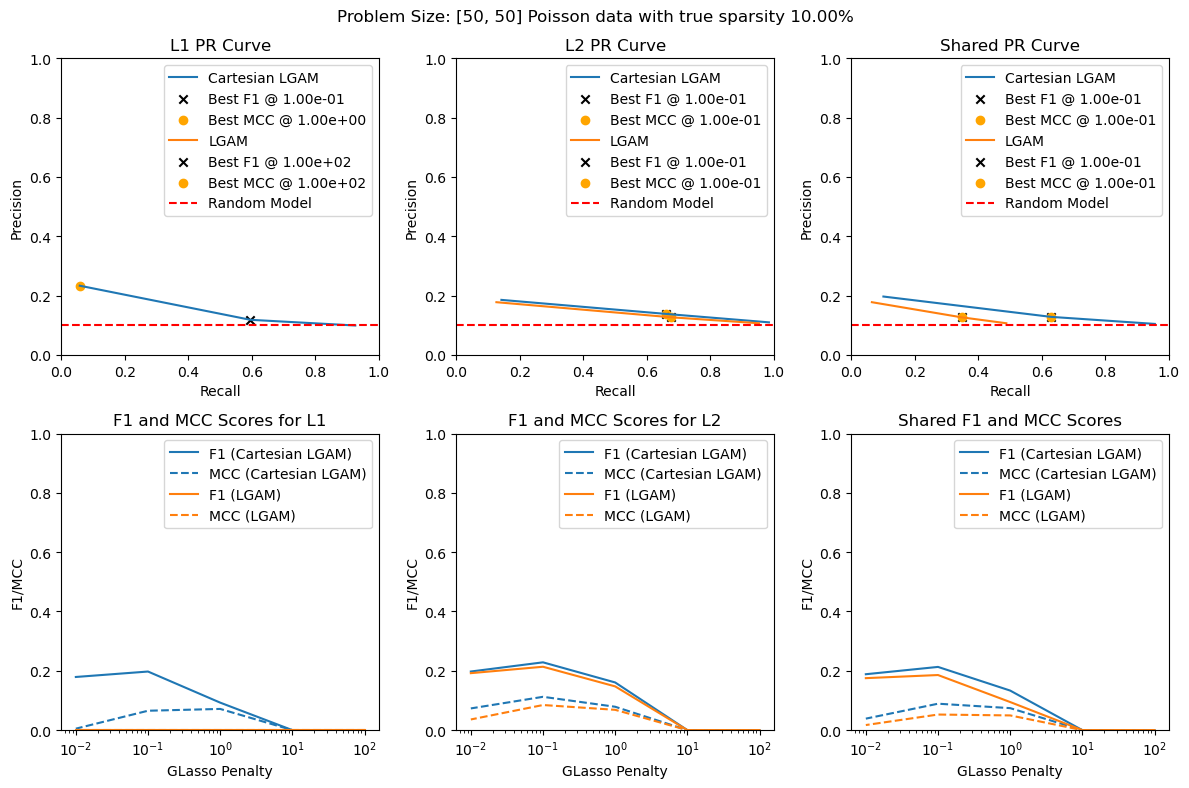

In [24]:
L_estim_patterns = patternify_Ls(Lss)
L_lgam_estim_patterns = patternify_Ls(Lss_lgam)

one_example_prs(
    L_patterns=L_patterns,
    Lss=Lss,
    Lss_lgam=Lss_lgam,
    glassoregs=glassoregs,
    sparsity=sparsity,
    source_distr="Poisson"
)
pass

In [12]:
estim_edges = [L[1][np.tril_indices_from(L[1], k=-1)] for L in L_estim_patterns]
baseline_edges = [L[1][np.tril_indices_from(L[1], k=-1)] for L in L_lgam_estim_patterns]
true_edges = L_patterns[1][np.tril_indices_from(L_patterns[1], k=-1)]

precs_clgam = [precision_score(true_edges, e) for e in estim_edges]
precs_lgam = [precision_score(true_edges, e) for e in baseline_edges]
recs_clgam = [recall_score(true_edges, e) for e in estim_edges]
recs_lgam = [recall_score(true_edges, e) for e in baseline_edges]

mccs_clgam = [matthews_corrcoef(true_edges, e) for e in estim_edges]
mccs_lgam = [matthews_corrcoef(true_edges, e) for e in baseline_edges]
auc_clgam = auc(recs_clgam, precs_clgam)
auc_lgam = auc(recs_lgam, precs_lgam)

print(
    f"""
    CLGAM:
        Max MCC: {max(mccs_clgam)}
        AUCPR: {auc_clgam}
    LGAM:
        Max MCC: {max(mccs_lgam)}
        AUCPR: {auc_lgam}
    """
)


    CLGAM:
        Max MCC: 0.1285802419119425
        AUCPR: 0.13818152366314634
    LGAM:
        Max MCC: 0.13782549211307318
        AUCPR: 0.13040175148811362
    


In [43]:
np.random.seed(0)
dims = (50, 50)
sparsity = 0.1
Ls, L_patterns = generate_Ls(dims, sparsity=sparsity)
X = generate_sylvester_data(Ls, normalize=True, source_distribution=np.random.poisson)

D = Dataset(
    dataset={'data': X},
    structure={'data': ('L1', 'L2')}
)

gmgm_estim_edges = []
for resolution in np.linspace(0, 1, 100):
    output = GmGM(
        D,
        to_keep=resolution,
        random_state=0,
        threshold_method='overall'
    )
    gmgm_estim_edges.append([output.precision_matrices[key].toarray() for key in ['L1', 'L2']])
print(len(gmgm_estim_edges))

L_gmgm_estim_patterns = patternify_Ls(gmgm_estim_edges)

estim_edges = [L[1][np.tril_indices_from(L[1])] for L in L_gmgm_estim_patterns]
true_edges = L_patterns[1][np.tril_indices_from(L_patterns[1])]

precs_gmgm = [precision_score(true_edges, e) for e in estim_edges]
recs_gmgm = [recall_score(true_edges, e) for e in estim_edges]

mccs_gmgm = [matthews_corrcoef(true_edges, e) for e in estim_edges]

sort_idxs = np.argsort(recs_gmgm)
auc_gmgm = auc(np.array(recs_gmgm)[sort_idxs], np.array(precs_gmgm)[sort_idxs])

print(
    f"""
    GmGM:
        Max MCC: {max(mccs_gmgm)}
        AUCPR: {auc_gmgm}
    """
)

/Users/baileyandrew/mambaforge/envs/Cartesian-LGAM/lib/python3.12/site-packages/GmGM/GmGM.py:231: UserWarning: This is outdated, will swap to using direct_left_eigenvectors in the future
  warnings.warn("This is outdated, will swap to using direct_left_eigenvectors in the future")


100

    GmGM:
        Max MCC: 0.1845671646337039
        AUCPR: 0.16629636418019897
    


/Users/baileyandrew/mambaforge/envs/Cartesian-LGAM/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [13]:
with open("results/synthetic_poisson", "wb") as fp:
    pickle.dump({
        'CLGAM': L_estim_patterns,
        'LGAM': L_lgam_estim_patterns,
        'True': L_patterns
    }, fp)

In [32]:
np.random.seed(0)
dims = (50, 50)
sparsity = 0.1
Ls, L_patterns = generate_Ls(dims, sparsity=sparsity)
Ls[1] = np.diag(np.ones(dims[1])) + np.diag(np.ones(dims[1]-1), k=-1)
L_patterns[1] = Ls[1] != 0
X = generate_sylvester_data(Ls, normalize=True, source_distribution=np.random.poisson)

L_init = [np.eye(d) for d in dims]

frobreg = 1/np.prod(dims)**(1/len(dims))
glassoregs = np.logspace(1, -2, 500) # (50, 50)
Lss, _ = warm_start(X, L_init, glassoregs=glassoregs, dont_warm_start=True, verbose=True)
Lss_lgam1, _ = warm_start(X, L_init, glassoregs=glassoregs, sample_axes={0}, dont_warm_start=True, verbose=True)
Lss_lgam2, _ = warm_start(X, L_init, glassoregs=glassoregs, sample_axes={1}, dont_warm_start=True, verbose=True)

L1 Param: 10.0
L1 Param: 9.862521794868782
L1 Param: 9.726933615426173
L1 Param: 9.593209477938244
L1 Param: 9.461323755890769
L1 Param: 9.331251175078247
L1 Param: 9.202966808760415
L1 Param: 9.076446072885359
L1 Param: 8.951664721378302
L1 Param: 8.82859884149515
L1 Param: 8.70722484923992
L1 Param: 8.587519484845174
L1 Param: 8.469459808314587
L1 Param: 8.353023195026779
L1 Param: 8.238187331399608
L1 Param: 8.124930210614052
L1 Param: 8.013230128396888
L1 Param: 7.903065678861348
L1 Param: 7.794415750404949
L1 Param: 7.687259521663732
L1 Param: 7.581576457522112
L1 Param: 7.477346305177588
L1 Param: 7.374549090259552
L1 Param: 7.273165113001458
L1 Param: 7.1731749444656145
L1 Param: 7.0745594228198785
L1 Param: 6.977299649665538
L1 Param: 6.881376986415667
L1 Param: 6.786773050723299
L1 Param: 6.6934697129586604
L1 Param: 6.60144909273489
L1 Param: 6.51069355548146
L1 Param: 6.421185709064761
L1 Param: 6.332908400455116
L1 Param: 6.2458447124396175
L1 Param: 6.159977960380167
L1 Pa

/Users/baileyandrew/Cartesian-LGAM/proximal_gradient_descent.py:43: UserWarning: Alpha too small, stopping line search
  warnings.warn("Alpha too small, stopping line search")


L1 Param: 1.8218853434651672
L1 Param: 1.7968383907677206
L1 Param: 1.7721357790803594
L1 Param: 1.7477727744646814
L1 Param: 1.72374470806362
L1 Param: 1.7000469752067178
L1 Param: 1.6766750345277
L1 Param: 1.6536244070941808
L1 Param: 1.6308906755493326
L1 Param: 1.6084694832653563
L1 Param: 1.5863565335085905
L1 Param: 1.5645475886160962
L1 Param: 1.5430384691835646
L1 Param: 1.5218250532643867
L1 Param: 1.5009032755797358
L1 Param: 1.4802691267395094
L1 Param: 1.459918652473979
L1 Param: 1.439847952876008
L1 Param: 1.4200531816536828
L1 Param: 1.4005305453932204
L1 Param: 1.3812763028320099
L1 Param: 1.3622867641416467
L1 Param: 1.3435582902208258
L1 Param: 1.3250872919979533
L1 Param: 1.3068702297433468
L1 Param: 1.2889036123908928
L1 Param: 1.2711839968690286
L1 Param: 1.2537079874409203
L1 Param: 1.2364722350537154
L1 Param: 1.2194734366967384
L1 Param: 1.2027083347685117
L1 Param: 1.1861737164524786
L1 Param: 1.1698664131013072
L1 Param: 1.153783299629661
L1 Param: 1.1379212939

/Users/baileyandrew/Cartesian-LGAM/plotting_utilities.py:79: RuntimeWarning: invalid value encountered in divide
  precs = [TPs[i] / (TPs[i] + FPs[i]) for i in range(len(dims))]
/Users/baileyandrew/Cartesian-LGAM/plotting_utilities.py:80: RuntimeWarning: invalid value encountered in divide
  shared_precs = shared_TPs / (shared_TPs + shared_FPs)
/Users/baileyandrew/Cartesian-LGAM/plotting_utilities.py:84: RuntimeWarning: invalid value encountered in divide
  f1s = [2*precs[i]*recs[i]/(precs[i]+recs[i]) for i in range(len(dims))]
/Users/baileyandrew/Cartesian-LGAM/plotting_utilities.py:86: RuntimeWarning: invalid value encountered in divide
  (TPs[i]*TNs[i] - FPs[i]*FNs[i])
/Users/baileyandrew/Cartesian-LGAM/plotting_utilities.py:97: RuntimeWarning: invalid value encountered in divide
  (shared_TPs * shared_TNs - shared_FPs * shared_FNs)


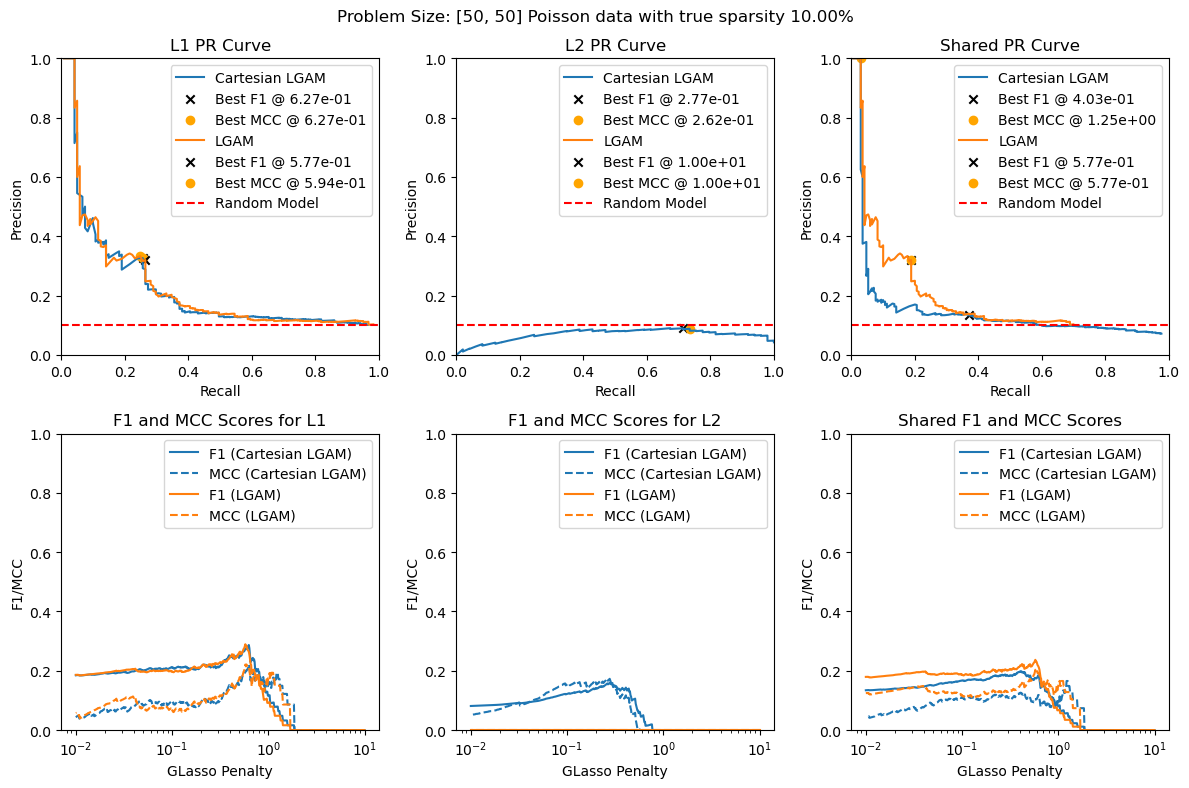

In [33]:
L_estim_patterns = patternify_Ls(Lss)
L_lgam_estim_patterns1 = patternify_Ls(Lss_lgam1)
L_lgam_estim_patterns2 = patternify_Ls(Lss_lgam2)

one_example_prs(
    L_patterns=L_patterns,
    Lss=Lss,
    Lss_lgam=Lss_lgam2,
    glassoregs=glassoregs,
    sparsity=sparsity,
    source_distr="Poisson"
)
pass

In [34]:
estim_edges = [L[0][np.tril_indices_from(L[0], k=-1)] for L in L_estim_patterns]
baseline_edges = [L[0][np.tril_indices_from(L[0], k=-1)] for L in L_lgam_estim_patterns2]
true_edges = L_patterns[0][np.tril_indices_from(L_patterns[0], k=-1)]

precs_clgam = [precision_score(true_edges, e) for e in estim_edges]
precs_lgam = [precision_score(true_edges, e) for e in baseline_edges]
recs_clgam = [recall_score(true_edges, e) for e in estim_edges]
recs_lgam = [recall_score(true_edges, e) for e in baseline_edges]

mccs_clgam = [matthews_corrcoef(true_edges, e) for e in estim_edges]
mccs_lgam = [matthews_corrcoef(true_edges, e) for e in baseline_edges]
auc_clgam = auc(recs_clgam, precs_clgam)
auc_lgam = auc(recs_lgam, precs_lgam)

print(
    f"""
    CLGAM:
        Max MCC: {max(mccs_clgam)}
        AUCPR: {auc_clgam}
    LGAM:
        Max MCC: {max(mccs_lgam)}
        AUCPR: {auc_lgam}
    """
)

/Users/baileyandrew/mambaforge/envs/Cartesian-LGAM/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/baileyandrew/mambaforge/envs/Cartesian-LGAM/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/baileyandrew/mambaforge/envs/Cartesian-LGAM/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif


    CLGAM:
        Max MCC: 0.2211259616045701
        AUCPR: 0.21893920672621953
    LGAM:
        Max MCC: 0.22137680396238665
        AUCPR: 0.22427953708039933
    


In [45]:
np.random.seed(0)
dims = (50, 50)
sparsity = 0.1
Ls, L_patterns = generate_Ls(dims, sparsity=sparsity)
Ls[1] = np.diag(np.ones(dims[1])) + np.diag(np.ones(dims[1]-1), k=-1)
L_patterns[1] = Ls[1] != 0
X = generate_sylvester_data(Ls, normalize=True, source_distribution=np.random.poisson)

D = Dataset(
    dataset={'data': X},
    structure={'data': ('L1', 'L2')}
)

gmgm_estim_edges = []
for resolution in np.linspace(0, 1, 100):
    output = GmGM(
        D,
        to_keep=resolution,
        random_state=0,
        threshold_method='overall'
    )
    gmgm_estim_edges.append([output.precision_matrices[key].toarray() for key in ['L1', 'L2']])
print(len(gmgm_estim_edges))

L_gmgm_estim_patterns = patternify_Ls(gmgm_estim_edges)

estim_edges = [L[0][np.tril_indices_from(L[0])] for L in L_gmgm_estim_patterns]
true_edges = L_patterns[0][np.tril_indices_from(L_patterns[0])]

precs_gmgm = [precision_score(true_edges, e) for e in estim_edges]
recs_gmgm = [recall_score(true_edges, e) for e in estim_edges]

mccs_gmgm = [matthews_corrcoef(true_edges, e) for e in estim_edges]

sort_idxs = np.argsort(recs_gmgm)
auc_gmgm = auc(np.array(recs_gmgm)[sort_idxs], np.array(precs_gmgm)[sort_idxs])

print(
    f"""
    GmGM:
        Max MCC: {max(mccs_gmgm)}
        AUCPR: {auc_gmgm}
    """
)

/Users/baileyandrew/mambaforge/envs/Cartesian-LGAM/lib/python3.12/site-packages/GmGM/GmGM.py:231: UserWarning: This is outdated, will swap to using direct_left_eigenvectors in the future
  warnings.warn("This is outdated, will swap to using direct_left_eigenvectors in the future")


100

    GmGM:
        Max MCC: 0.2505230895908262
        AUCPR: 0.22886571674686723
    


/Users/baileyandrew/mambaforge/envs/Cartesian-LGAM/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [36]:
estim_edges = [L[1][np.tril_indices_from(L[1], k=-1)] for L in L_estim_patterns]
baseline_edges = [L[1][np.tril_indices_from(L[1], k=-1)] for L in L_lgam_estim_patterns1]
true_edges = L_patterns[1][np.tril_indices_from(L_patterns[1], k=-1)]

precs_clgam = [precision_score(true_edges, e) for e in estim_edges]
precs_lgam = [precision_score(true_edges, e) for e in baseline_edges]
recs_clgam = [recall_score(true_edges, e) for e in estim_edges]
recs_lgam = [recall_score(true_edges, e) for e in baseline_edges]

mccs_clgam = [matthews_corrcoef(true_edges, e) for e in estim_edges]
mccs_lgam = [matthews_corrcoef(true_edges, e) for e in baseline_edges]
auc_clgam = auc(recs_clgam, precs_clgam)
auc_lgam = auc(recs_lgam, precs_lgam)

print(
    f"""
    CLGAM:
        Max MCC: {max(mccs_clgam)}
        AUCPR: {auc_clgam}
    LGAM:
        Max MCC: {max(mccs_lgam)}
        AUCPR: {auc_lgam}
    """
)

/Users/baileyandrew/mambaforge/envs/Cartesian-LGAM/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/baileyandrew/mambaforge/envs/Cartesian-LGAM/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/baileyandrew/mambaforge/envs/Cartesian-LGAM/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif


    CLGAM:
        Max MCC: 0.17394757238299272
        AUCPR: 0.06812823097827711
    LGAM:
        Max MCC: 0.15301888771544994
        AUCPR: 0.060844125226394166
    


In [46]:
np.random.seed(0)
dims = (50, 50)
sparsity = 0.1
Ls, L_patterns = generate_Ls(dims, sparsity=sparsity)
Ls[1] = np.diag(np.ones(dims[1])) + np.diag(np.ones(dims[1]-1), k=-1)
L_patterns[1] = Ls[1] != 0
X = generate_sylvester_data(Ls, normalize=True, source_distribution=np.random.poisson)

D = Dataset(
    dataset={'data': X},
    structure={'data': ('L1', 'L2')}
)

gmgm_estim_edges = []
for resolution in np.linspace(0, 1, 100):
    output = GmGM(
        D,
        to_keep=resolution,
        random_state=0,
        threshold_method='overall'
    )
    gmgm_estim_edges.append([output.precision_matrices[key].toarray() for key in ['L1', 'L2']])
print(len(gmgm_estim_edges))

L_gmgm_estim_patterns = patternify_Ls(gmgm_estim_edges)

estim_edges = [L[1][np.tril_indices_from(L[1])] for L in L_gmgm_estim_patterns]
true_edges = L_patterns[1][np.tril_indices_from(L_patterns[1])]

precs_gmgm = [precision_score(true_edges, e) for e in estim_edges]
recs_gmgm = [recall_score(true_edges, e) for e in estim_edges]

mccs_gmgm = [matthews_corrcoef(true_edges, e) for e in estim_edges]

sort_idxs = np.argsort(recs_gmgm)
auc_gmgm = auc(np.array(recs_gmgm)[sort_idxs], np.array(precs_gmgm)[sort_idxs])

print(
    f"""
    GmGM:
        Max MCC: {max(mccs_gmgm)}
        AUCPR: {auc_gmgm}
    """
)

/Users/baileyandrew/mambaforge/envs/Cartesian-LGAM/lib/python3.12/site-packages/GmGM/GmGM.py:231: UserWarning: This is outdated, will swap to using direct_left_eigenvectors in the future
  warnings.warn("This is outdated, will swap to using direct_left_eigenvectors in the future")


100

    GmGM:
        Max MCC: 0.264108414425508
        AUCPR: 0.14168652410418725
    


/Users/baileyandrew/mambaforge/envs/Cartesian-LGAM/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [35]:
with open("results/synthetic_poisson_autoregressive", "wb") as fp:
    pickle.dump({
        'CLGAM': L_estim_patterns,
        'LGAM1': L_lgam_estim_patterns1,
        'LGAM2': L_lgam_estim_patterns2,
        'True': L_patterns
    }, fp)